In [2]:
# 코스타리카 가구빈곤수준 예측

- Understand the problem
- Exploratory Data Analysis of the dataset
- feature engineering to create a dataset for machine learning 
- compare several baseline machine learning models 
- try more complex machine learning models 
- optimize the selected model
- investigate model predictions in context of problem
- draw conclusions and lay out next steps 

## Problem and Data Explanation

- train.csv 와 test.csv의 두가지 파일이 제공된다
- train.csv는 9557 행, 143열
- test.csv는 23856행, 142열
- 각 행은 하나의 개인을 나타내며 각 열은 개인에 고유한 특징이거나 개인의 가구에 대한 특징이다. 
- training set 에는 하나의 열 'target'이 추가되어 있는데, 이는 빈곤레벨을 1~4 스케일로 표현했다. 1이 가장 극빈곤을 의미한다. 

이것은 supervised multi-class classification machine learning 문제이다. training data가 label과 함께 제공되기 때문에 supervised이고, 라벨은 4개의 클래스를 가진 이산형 값이기 때문에 multi-class classification 이다. 


- object : 목표는 가계 기준으로 빈곤을 예측 하는 것이다. 

important note: 모든 가족 멤버들이 training data에서 같은 라벨을 가지고 있어야 하지만 같은 가족 내에서도 다른 라벨을 가지고 있다는 에러가 있다. 이럴 경우에는 우리는 각각의 가정의 head (대장) 의 라벨을 사용했따. 이는 parentesco1 == 1.0 이 있는 행에서 알 수 있다. 

143개의 칼럼이 있고, 그 중 몇 개만 적었다. 

id: 각 개인에 대한 고유 구분자, 이것은 우리가 사용하는 feature 가 되어서는 안된다

idhogar: 각 가구의 고유 식별자, 이 변수는 feature 는 아니지만 한 가구의 모든 개인이 동일한 식별자를 가지기 때문에 가구별로 개인을 그룹화하는데 사용된다. 

parentesco1: 이 사람이 가장인지 표시한다. 

target: 한 가구의 모든 구성원에 대해 같아야 하는 레벨 


raw data: household data + individual data

head of household 가 없는 경우가 있는데 이는 사용될 수 없음 


## Eploratory Data Analysis and feature engineering 

In [3]:
# Data manipulation 
import pandas as pd
import numpy as np

# Visulization
import matplotlib.pyplot as plt
import seaborn as sns

# set a few plotting defaults 
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

### Read in Data and Look at Summary Information

In [4]:
pd.options.display.max_columns = 150

# Read in data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_279628684  190000.0       0      3       0     1       1     0    NaN   
1  ID_f29eb3ddd  135000.0       0      4       0     1       1     1    1.0   
2  ID_68de51c94       NaN       0      8       0     1       1     0    NaN   
3  ID_d671db89c  180000.0       0      5       0     1       1     1    1.0   
4  ID_d56d6f5f5  180000.0       0      5       0     1       1     1    1.0   

   r4h1  r4h2  r4h3  r4m1  r4m2  r4m3  r4t1  r4t2  r4t3  tamhog  tamviv  \
0     0     1     1     0     0     0     0     1     1       1       1   
1     0     1     1     0     0     0     0     1     1       1       1   
2     0     0     0     0     1     1     0     1     1       1       1   
3     0     2     2     1     1     2     1     3     4       4       4   
4     0     2     2     1     1     2     1     3     4       4       4   

   escolari  rez_esc  hhsize  paredblolad  paredzocalo  paredpreb  pareddes  \
0        10      NaN       1            1            0          0         0   
1        12      NaN       1            0            0          0         0   
2        11      NaN       1            0            0          0         0   
3         9      1.0       4            1            0          0         0   
4        11      NaN       4            1            0          0         0   

   paredmad  paredzinc  paredfibras  paredother  pisomoscer  pisocemento  \
0         0          0            0           0           1            0   
1         1          0            0           0           0            0   
2         1          0            0           0           1            0   
3         0          0            0           0           1            0   
4         0          0            0           0           1            0   

   pisoother  pisonatur  pisonotiene  pisomadera  techozinc  techoentrepiso  \
0          0          0            0           0          0               1   
1          0          0            0           1          1               0   
2          0          0            0           0          1               0   
3          0          0            0           0          1               0   
4          0          0            0           0          1               0   

   techocane  techootro  cielorazo  abastaguadentro  abastaguafuera  \
0          0          0          1                1               0   
1          0          0          1                1               0   
2          0          0          1                1               0   
3          0          0          1                1               0   
4          0          0          1                1               0   

   abastaguano  public  planpri  noelec  coopele  sanitario1  sanitario2  \
0            0       1        0       0        0           0           1   
1            0       1        0       0        0           0           1   
2            0       1        0       0        0           0           1   
3            0       1        0       0        0           0           1   
4            0       1        0       0        0           0           1   

   sanitario3  sanitario5  sanitario6  energcocinar1  energcocinar2  \
0           0           0           0              0              0   
1           0           0           0              0              1   
2           0           0           0              0              1   
3           0           0           0              0              1   
4           0           0           0              0              1   

   energcocinar3  energcocinar4  elimbasu1  elimbasu2  elimbasu3  elimbasu4  \
0              1              0          1          0          0          0   
1              0              0          1          0          0          0   
2              0              0          1          0          0          0   
3              0              0          1          0

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


integer 열은 0 또는 1에 해당하는 부울 변수 또는 이산 순서 값을 갖는 순서형 변수를 나타낼 수 있다. object 열은 머신러닝 모델에 직접 넣을 수 없기 때문에 문제가 될 수 있다. 

train set 보다 열이 많은 test set

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


### Integer columns

정수 열에 있는 고유값의 분포 살펴보기 각 열에 대해 고유 값 수를 세어 막대 그래프로 결과를 표시한다. 

Text(0.5, 1.0, 'Count of Unique Values in Integer columns')

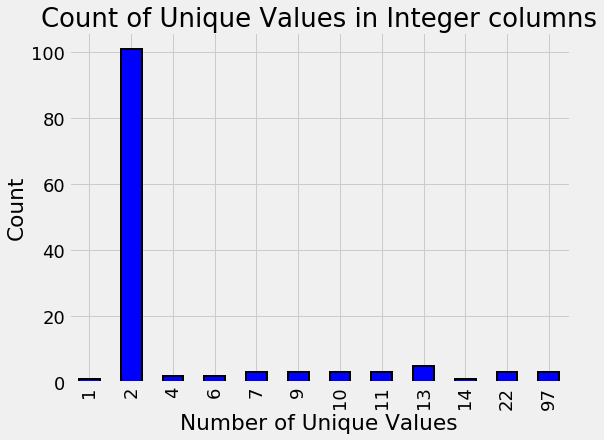

In [7]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color='blue',
                                                                            figsize = (8,6),
                                                                            edgecolor='k',
                                                                            linewidth=2)
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Integer columns')

가구 수준의 boolean columns 면 통합할 필요가 없지만 개인 수준의 feature는 통합할 필요가 있다. 

### float columns

- 타겟 별로 다른 색깔로 float columns의 분포를 보여준다. (orderdict 함수 사용하여 빈곤 수준을 색상으로 매핑) 
- 이를 통해서 household poverty level 에 따라 변동 분포의 유의미한 차이가 있는지 확인할 수 있다. 

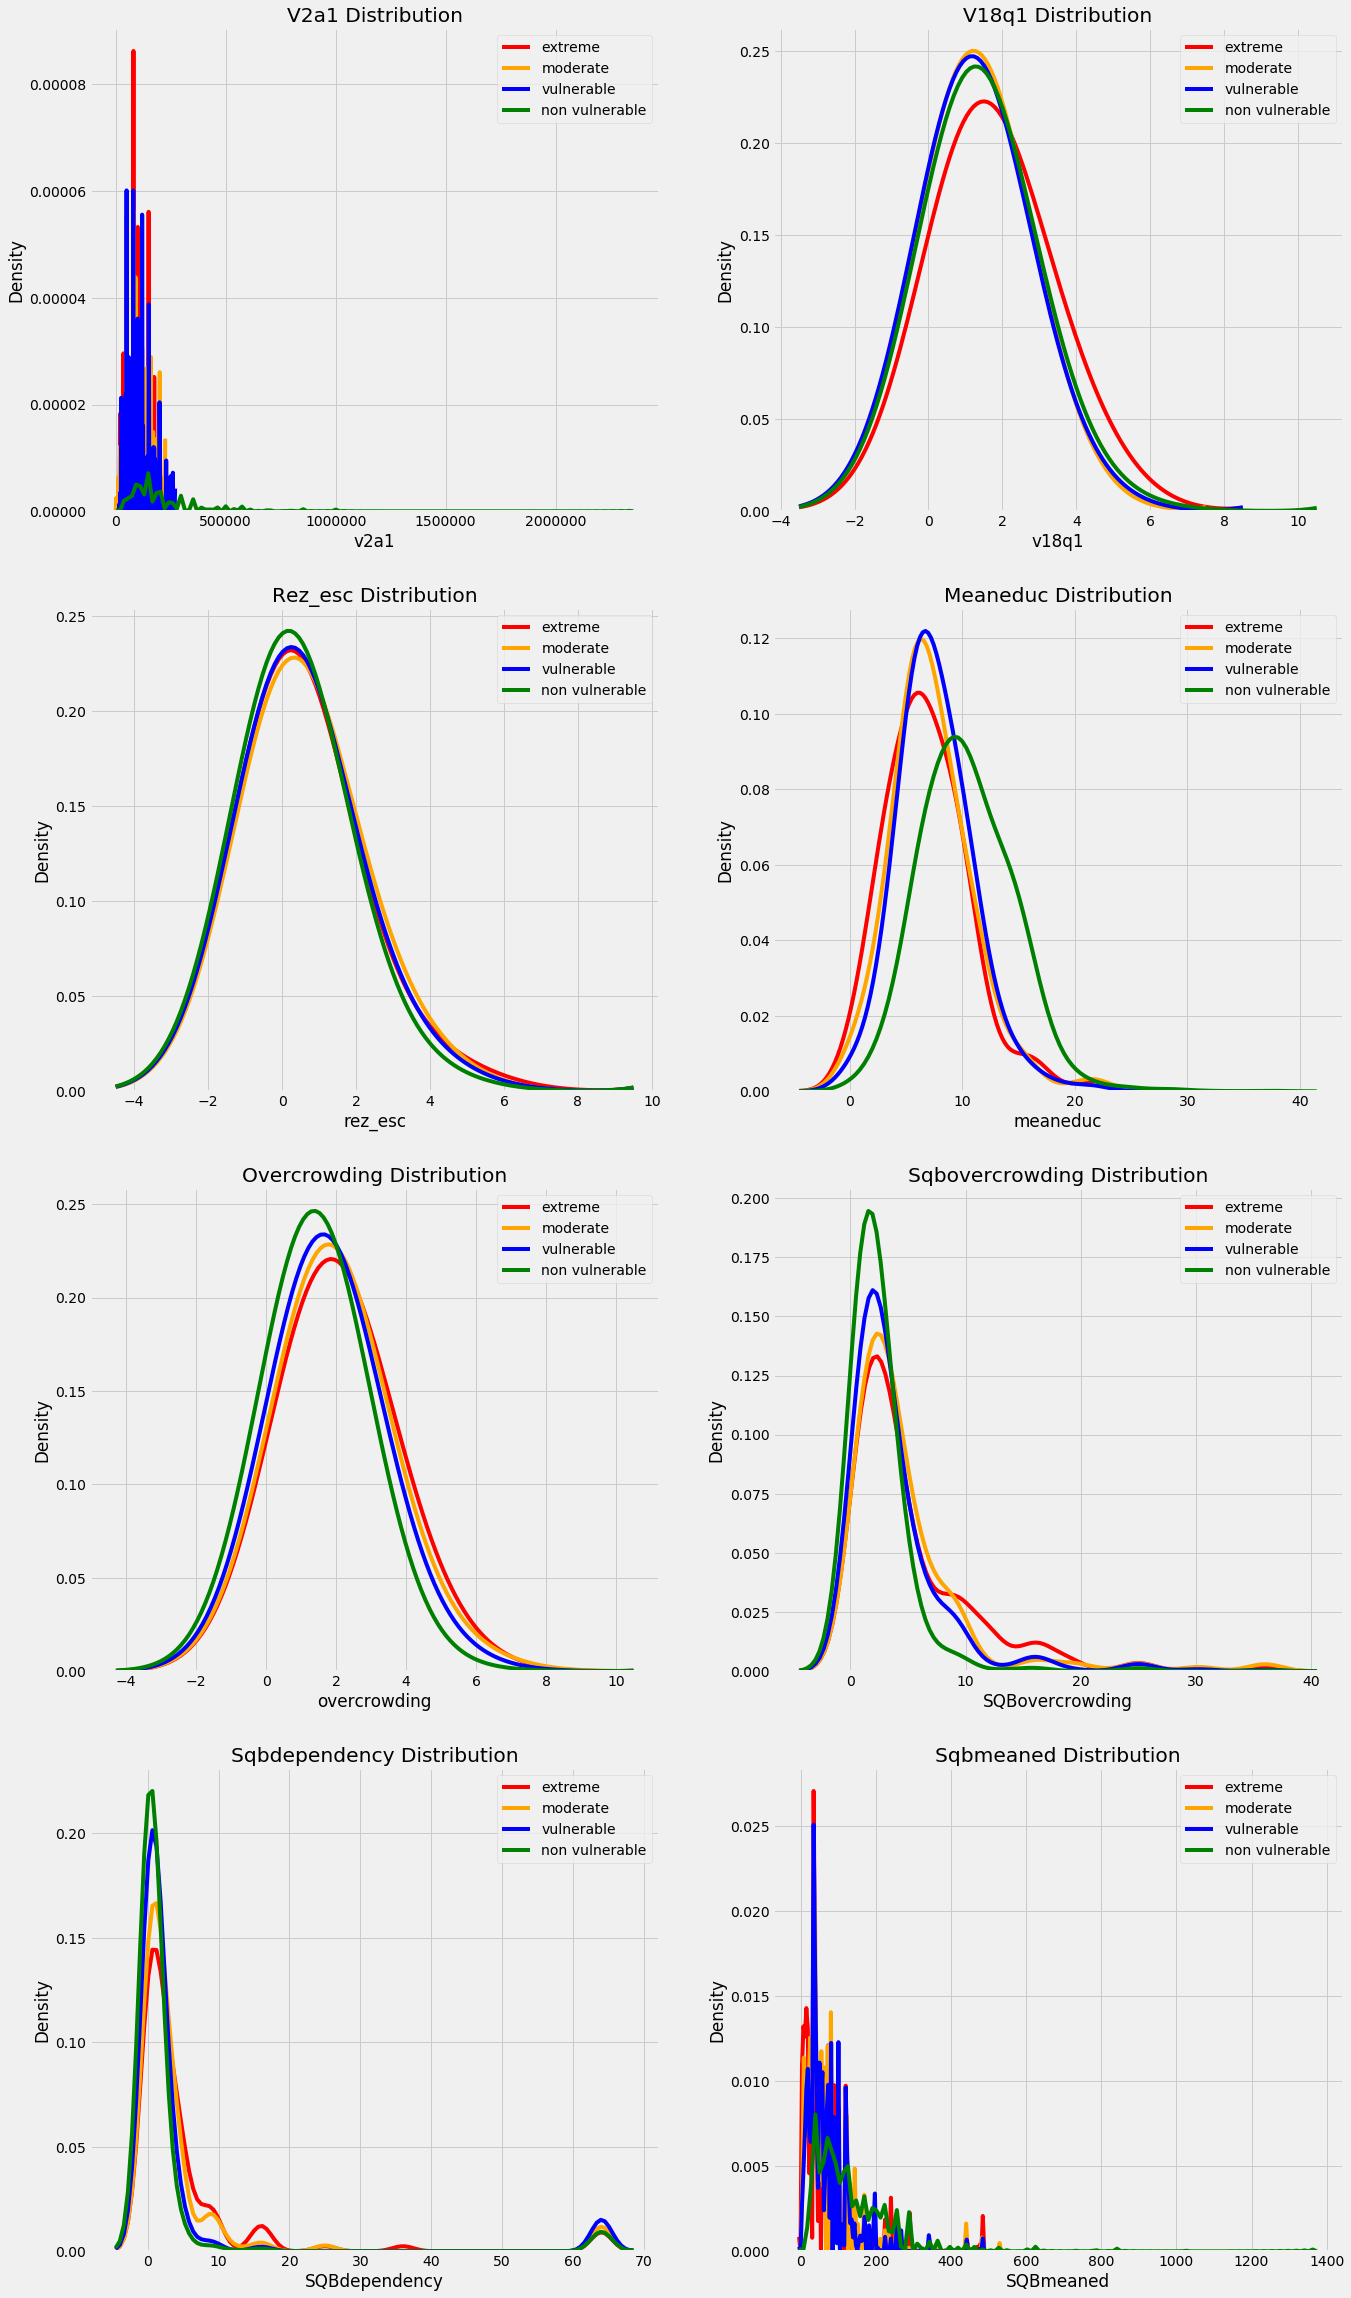

In [8]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level],bw=1.5)
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

 - meanedu에서 label 별 평균에듀의 값의 분포가 가장 다른 것을 확인할 수 있다. 이는 변수와 목표값 사이의 상관관계를 계산하여 형상 간의 관계를 측정하는데 도움을 준다. 

### Object Columns

In [9]:
train.select_dtypes('object').head()

Id    idhogar dependency edjefe edjefa
0  ID_279628684  21eb7fcc1         no     10     no
1  ID_f29eb3ddd  0e5d7a658          8     12     no
2  ID_68de51c94  2c7317ea8          8     no     11
3  ID_d671db89c  2b58d945f        yes     11     no
4  ID_d56d6f5f5  2b58d945f        yes     11     no

- dependency: 계산된 종속율 = (19세 이하 가구원 수 또는 64세 이상 가구원 수)/(19세~64세 가구원 수)
- edjeffe: 에스코라리(교육연수), 가구원수 및 성별의 상호작용을 바탕으로 한 남성가구원장의 수년간 교육, 예=1과 아니오=0
- edjefa: 에스코라리(교육연수), 가구원수 및 성별의 상호작용을 바탕으로 한 여성가구원장의 교육연수, 예=1과 아니오=0

우리는 매핑을 사용하여 변수를 수정하고 floats로 변환할 수 있다.

In [10]:
mapping = {"yes": 1, "no": 0}

# Apply same operation to both train and test
for df in [train, test]:
    # Fill in the values with the correct mapping
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

dependency       edjefa       edjefe
count  9557.000000  9557.000000  9557.000000
mean      1.149550     2.896830     5.096788
std       1.605993     4.612056     5.246513
min       0.000000     0.000000     0.000000
25%       0.333333     0.000000     0.000000
50%       0.666667     0.000000     6.000000
75%       1.333333     6.000000     9.000000
max       8.000000    21.000000    21.000000

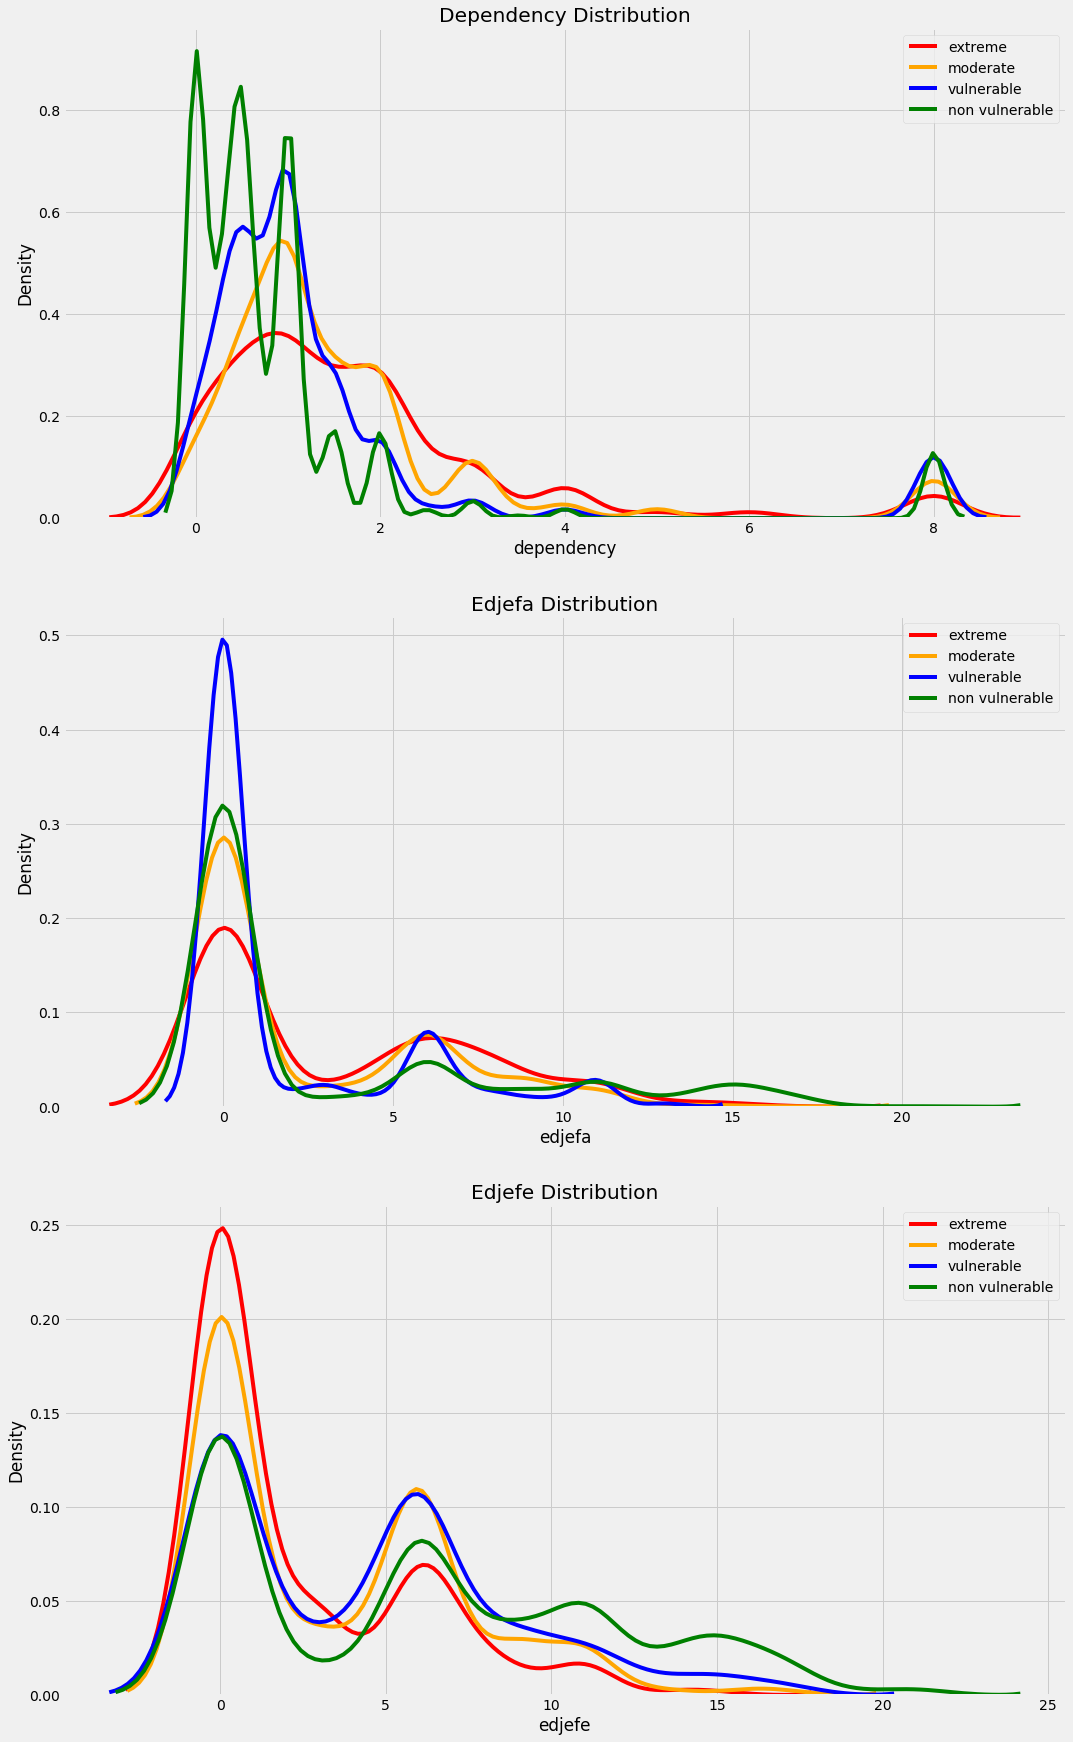

In [11]:
plt.figure(figsize = (16, 12))

# Iterate through the float columns
for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
         sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(),
                     ax = ax, color = color, label = poverty_mapping[poverty_level])
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')
plt.subplots_adjust(top = 2)

이 변수들은 이제 숫자로 정확하게 표현되고 기계 학습 모델에 주입될 수 있다.

위와 같은 feature engineering 을 쉽게 하기 위해 train data set 과 test data set 을 합칠 것이다. 같은 operations 과 same features 를 제공해야하기 때문이다. 나중에 object 를 기준으로 세트를 분리하면 된다. 

In [12]:
# Add null Target column to test
test['Target'] = np.nan
data = train.append(test, ignore_index = True)

## Exploring Label Distribution

다음으로, 우리는 라벨의 분포를 보면 문제가 얼마나 불균형적인지 알 수 있다. 4개의 가능한 정수 수준이 있으며 이는 4개의 다른 빈곤 수준을 나타낸다. 정확한 라벨을 보기 위해서, 우리는 parentesco1 == 1이 있는 기둥에 대해서만 부분집합할 것이다. 왜냐하면 이것은 각 가정에 맞는 라벨인 가장이기 때문이다.

아래 막대 그림은 (시험 라벨이 없기 때문에) 교육용 라벨의 분포를 보여준다.

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

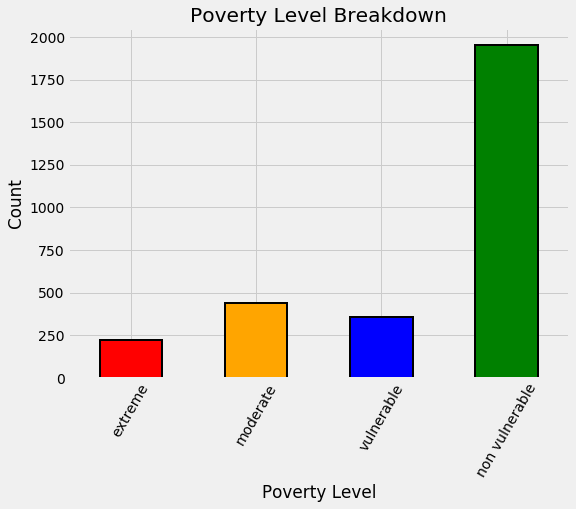

In [13]:
# Heads of household
heads = data.loc[data['parentesco1'] == 1].copy()

# Labels for training
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1), ['Target', 'idhogar']]

# Value counts of target
label_counts = train_labels['Target'].value_counts().sort_index()

# Bar plot of occurrences of each label
label_counts.plot.bar(figsize = (8, 6), 
                      color = colors.values(),
                      edgecolor = 'k', linewidth = 2)

# Formatting
plt.xlabel('Poverty Level'); plt.ylabel('Count'); 
plt.xticks([x - 1 for x in poverty_mapping.keys()], 
           list(poverty_mapping.values()), rotation = 60)
plt.title('Poverty Level Breakdown')

label_counts

우리는 불균형한 계급 문제를 다루고 있다. (이것은 왜 대회 주최자들이 가중 F1이 아닌 매크로 F1 점수를 미터법으로 선택하는지를 흥미롭게 만든다!) 다른 어떤 항목보다 취약하지 않은 가구로 분류되는 가구가 더 많다. 극도의 빈곤층은 가장 작다. (이것은 우리를 낙관적으로 만들 것이라고 생각한다!)

불균형 분류 문제의 한 가지 문제는 기계학습 모델이 소수계층의 예시가 훨씬 적기 때문에 이를 예측하는 데 어려움을 겪을 수 있다는 점이다. 클래스 불균형 문제를 해결할 수 있는 한 가지 잠재적인 방법은 오버샘플링(더 고급 노트북에 수록되어 있음)이다.

## Addressing Wrong Labels

어떤 현실적인 데이터 세트와 마찬가지로, 코스타리카 빈곤 데이터에도 몇 가지 문제가 있다. 일반적으로 데이터 과학 프로젝트의 80%는 데이터를 청소하고 이상 징후/오류를 수정하는 데 소요된다. 이러한 오류는 인간의 입력 오류, 측정 오류 또는 때로는 맞는 값이지만 눈에 띄는 극단값일 수 있다. 이 문제에 대해, 같은 가구에 있는 개개인의 빈곤 수준이 다르기 때문에, 일부 라벨은 정확하지 않다. 우리는 왜 이런 일이 일어날 수 있는지 알지는 못하지만, 가장을 진짜 라벨로 사용하라는 말을 듣는다.

그 정보는 우리의 일을 훨씬 더 쉽게 만들지만, 현실의 문제에서는 왜 라벨이 잘못된 것인지, 그리고 그 문제를 우리 스스로 해결하는 방법을 알아내야 할 것이다. 이 절에서는 라벨이 꼭 필요한 것은 아니지만 라벨이 부착된 문제를 수정한다: 나는 단지 우리가 이 문제를 어떻게 다룰 수 있는지를 보여주기 위해 노트북에 보관했다

### Identify Errors

먼저 오류를 찾아야만 고칠 수 있다. 가족 구성원의 라벨이 다른 가구를 찾기 위해 가구별로 데이터를 그룹화한 후 대상의 고유한 값이 하나만 있는지 확인할 수 있다

In [14]:
# Groupby the household and figure out the number of unique values
# idhogar: 각 가구의 고유 식별자  
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


Let's look at one example

In [15]:
train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

idhogar  parentesco1  Target
7651  0172ab1d9            0       3
7652  0172ab1d9            0       2
7653  0172ab1d9            0       3
7654  0172ab1d9            1       3
7655  0172ab1d9            0       2

주최측은 우리에게 the correct 라벨이 가장을 위한 것이라고 말한다. parentesco1 == 1인 경우를 말하는. 이 가구의 경우 모든 구성원에 대해 올바른 라벨은 3이다. 이 가정의 모든 개인에게 올바른 빈곤 수준을 재할당함으로써 이 문제를 해결할 수 있다. 현실 세계에서는, 문제를 어떻게 해결할 것인가에 대한 어려운 결정을 스스로 내려야 할 수도 있다(혹은 팀의 도움을 받아).

### Families without Heads of Household

우리는 같은 가구에 있는 개인에게 가장의 라벨을 할당함으로써 라벨 불일치를 모두 시정할 수 있다. 그러나 잠깐, 여러분은 이렇게 물을지도 모른다. "만약 가장이 없는 가구가 있다면? 그리고 만약 그 가구들의 구성원들이 라벨에 대한 다른 가치를 가지고 있다면 어떨까?"

음, 네가 물어봤으니, 그 질문을 정확히 조사해보자!

-> 가장이 없는데 가구의 구성원들도 다른 라벨을 가지고 있는 경우

In [16]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()

# Find households without a head
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [17]:
# Find households without a head and where labels are different

households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different labels.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different labels.


다행이군! 이것은 우리가 가장이 없고 멤버들의 라벨이 다른 가정에 대해 걱정할 필요가 없다는 것을 의미해! 이 문제에 대해 주최 측에 따르면, 만약 한 가정에 머리가 없다면, 진정한 라벨은 없다고 한다. 따라서, 우리는 실제로 훈련을 위한 가장이 없는 가구를 사용하지 않을 것이다. 그럼에도 불구하고, 데이터를 조사하는 과정을 거치는 것은 여전히 좋은 연습이다!

### Correct Errors
에러 수정 

이제 우리는 가정이 있는 가구의 라벨을 수정할 수 있고 구성원들은 서로 다른 빈곤 수준을 가지고 있다.

In [18]:
# Iterate through each household
for household in not_equal.index:
    # Find the correct label (for the head of household)
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    # Set the correct label for all members in the household
    train.loc[train['idhogar'] == household, 'Target'] = true_target

# Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


우리는 라벨을 위해서 가장만을 사용할 것이기 때문에, 이 단계는 완전히 필요한 것은 아니지만 실생활에서 발생할 수 있는 데이터 오류를 수정하는 워크플로우를 보여준다. 일을 더 한다고 생각하지 말고, 경력을 위해 연습해!

## Missing Variables

탐구 데이터 분석의 가장 중요한 단계 중 하나는 데이터에서 결측값을 찾아 처리 방법을 결정하는 것이다. 우리가 기계 학습 모델을 사용하기 전에 누락된 값을 채워야 하며, 우리는 그 특징을 바탕으로 그것들을 채우기 위한 최선의 전략을 생각해야 한다: 이것이 우리가 데이터 정의를 파헤치기 시작해야 할 부분이다.

먼저 각 열에서 결측값의 백분율을 살펴볼 수 있다

In [19]:
# Number of missing in each column
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(data)

missing.sort_values('percent', ascending = False).head(10).drop('Target')

total   percent
rez_esc       27581  0.825457
v18q1         25468  0.762218
v2a1          24263  0.726154
SQBmeaned        36  0.001077
meaneduc         36  0.001077
hogar_adul        0  0.000000
parentesco10      0  0.000000
parentesco11      0  0.000000
parentesco12      0  0.000000

테스트 데이터를 위해 NaN을 만들었기 때문에 우리는 타겟에 대해 걱정할 필요가 없다. 그러나 결측값 비율이 높은 나머지 3개 열에 대해서는 다루어야 한다.

v18q1: 태블릿 수

가족 소유의 태블릿 수를 나타내는 v18q1부터 시작해보자. 우리는 이 변수의 값 카운트를 볼 수 있다. 이게 가계 변수니까 가구 차원에서만 보는 게 말이 되니까 가장의 행만 뽑겠다.

value count를 표시할 function

다른 열에 대한 값 카운트를 그리고 싶을 수도 있기 때문에, 우리는 우리를 위해 그것을 할 수 있는 간단한 함수를 쓸 수 있다.

In [20]:
def plot_value_counts(df, col, heads_only = False):
    """Plot value counts of a column, optionally with only the heads of a household"""
    # Select heads of household
    if heads_only:
        df = df.loc[df['parentesco1'] == 1].copy()
        
    plt.figure(figsize = (8, 6))
    df[col].value_counts().sort_index().plot.bar(color = 'blue',
                                                 edgecolor = 'k',
                                                 linewidth = 2)
    plt.xlabel(f'{col}'); plt.title(f'{col} Value Counts'); plt.ylabel('Count')
    plt.show();

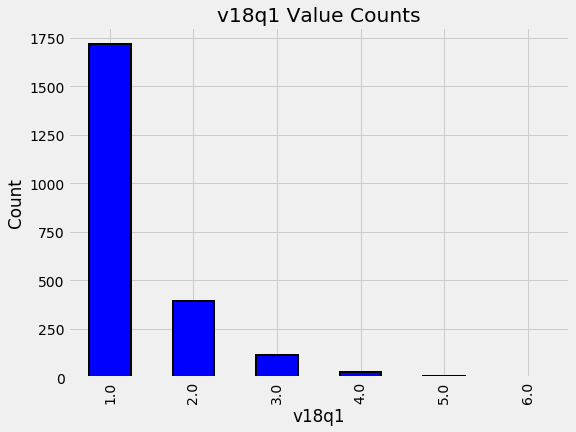

In [21]:
plot_value_counts(heads, 'v18q1')

존재하는 데이터만 가지고 간다면 소유할 태블릿의 수가 가장 흔한 1인 것처럼 보인다. 다만 빠진 자료도 생각해 볼 필요가 있다. 이 경우, 이 범주에서 nan을 가진 가정은 태블릿을 소유하지 않을 수도 있다! 데이터 정의를 살펴보면 v18q가 한 가족이 태블릿을 소유하는지 여부를 나타내는 것을 볼 수 있다. 우리는 이 칼럼과 number of tablets을 결합하여 우리의 가설이 지탱하고 있는지 살펴봐야 한다.

v18q 값(태블릿 소유의 경우 1, 그렇지 않은 경우 0)으로 그룹화한 다음 v18q1의 null 값 수를 계산할 수 있다. 이것은 우리에게 그 null 값이 그 가족이 태블릿을 소유하지 않았다는 것을 나타내는지를 말해줄 것이다

In [22]:
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())
# 태블릿 수가 null인 경우, 태블릿을 가지고 있는지 없는지를 나타내는 변수를 보니 
# 모두 0의 값을 갖지고 있다. 이 의미는 태블릿 수가 null인 경우 태블릿을 안 가지고 있음을 알 수 있다. 때문에 
# v18q1를 0으로 바꿔준다. 
# v18q1(가지고 있는 태블릿 수), v18q(태블릿을 가지고 있는지 = 1, 없는지 = 0)

v18q
0    8044
1       0
Name: v18q1, dtype: int64

자, 그러면 문제가 해결된다! v18q1용 nan을 가진 모든 가정은 태블릿을 소유하지 않는다. 따라서 이 결측값을 0으로 채울 수 있다.

In [23]:
data['v18q1'] = data['v18q1'].fillna(0)

v2a1: 월세 지불하는 금액 

다음 누락된 컬럼은 v2a1로 월세 지불 금액을 나타낸다.

월세 지불 금액의 누락된 가치에 대해서도 살펴보는 것 외에 주택의 소유/임대 현황을 보여주는 칼럼인 tipovivi_의 분포도 살펴볼 수 있을 것이다. 이 플롯을 위해, 우리는 월 임대료를 지불하기 위해 나노를 가진 주택들의 소유 현황을 보여준다.

주택을 소유할 경우 -> 월세를 내지 않는다 -> null값 발생 

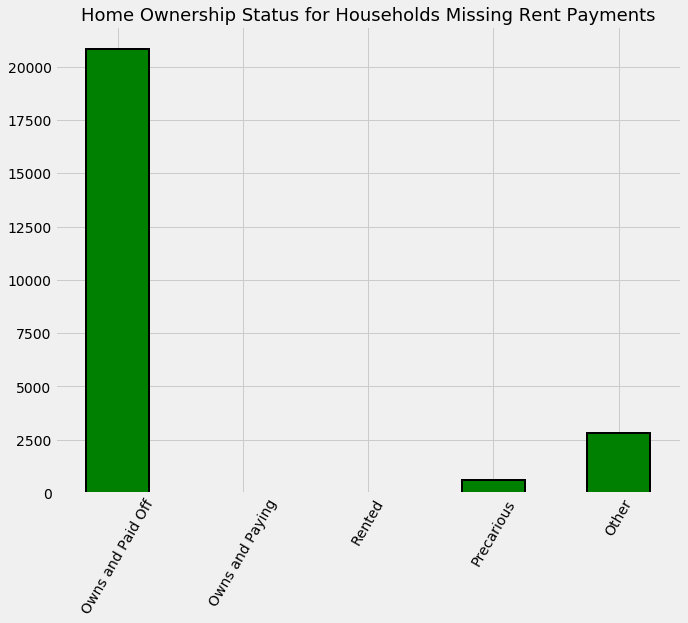

In [24]:
# Variables indicating home ownership
own_variables = [x for x in data if x.startswith('tipo')]

# Plot of the home ownership(주택 소유) variables for home missing rent payments
data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8),
                                                                        color = 'green',
                                                              edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

The meaning of the home ownership variables is below:

- tipovivi1, =1 소유 및 완전 유급 주택
- tipovivi2, "=1 소유, 할부로 지불"
- tipovivi3, =1 임대
- tipovivi4, =1 불안정
- tipovivi5, "=1 기타(기타, 대여)"

우리가 문제를 해결했어! 음, 대부분: 월세를 내지 않는 가정들은 일반적으로 자신의 집을 소유하고 있다. 다른 몇 가지 상황에서는 정보가 누락된 이유를 알 수 없다.

월세 납부액이 누락된 소유 주택에 대해서는 임대료 납부액을 0으로 설정할 수 있다. 다른 가정에서는 누락된 값을 귀속시킬 수 있지만, 이러한 가구에 누락된 값이 있음을 나타내는 플래그(부울) 컬럼을 추가하겠다.

In [25]:
# Fill in households that own the house with 0 rent payment
# house를 소유한 가정의 v2a1: 월세 지불하는 금액은 0으로 설정 
data.loc[(data['tipovivi1'] == 1), 'v2a1'] = 0

# Create missing rent payment column
data['v2a1-missing'] = data['v2a1'].isnull()

data['v2a1-missing'].value_counts()

False    29994
True      3419
Name: v2a1-missing, dtype: int64

rez_esc: 몇 년 뒤처진 학창시절.

누락된 값의 비율이 높은 마지막 열은 rez_esc로 학창시절의 뒤처짐을 나타낸다. 값이 null인 가정의 경우, 현재 학교에 자녀가 없을 가능성이 있다. 이 칼럼에서 누락된 값이 있는 사람들의 나이와 누락된 값이 없는 사람들의 나이를 찾아내어 이것을 시험해 보자.

In [26]:
# 몇 년 뒤쳐진 학창시절의 값이 null이 아닌 age 분포
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    5832.000000
mean       12.185700
std         3.198618
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

missing value이면서 가장 나이든 나이가 17세다. 이것보다 나이가 많은 사람이라면, 어쩌면 우리는 그들이 단순히 학교에 있지 않다고 생각할 수 있을 것이다. missing value 를 가진 사람들의 나이를 살펴보자.

In [27]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    27581.000000
mean        39.110656
std         20.983114
min          0.000000
25%         24.000000
50%         38.000000
75%         54.000000
max         97.000000
Name: age, dtype: float64

우리가 이 대회를 위한 토론의 일부를 읽으면, 우리는 이 변수가 7세에서 19세 사이의 개인에 대해서만 정의된다는 것을 배운다. 이 범위보다 어리거나 나이가 많은 사람은 아마도 몇 년 뒤처지지 않으며 따라서 그 값은 0으로 설정되어야 한다. 이 변수의 경우, 개인이 19를 초과하여 결측값을 가지거나, 7보다 어리고 결측값을 가지면 0으로 설정할 수 있다. 다른 사람을 위해 우리는 값을 귀속시키고 부울기를 추가할 것이다.

In [28]:
# If individual is over 19 or younger than 7 and missing years behind, set it to 0
data.loc[((data['age'] > 19) | (data['age'] < 7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

# Add a flag for those between 7 and 19 with a missing value
data['rez_esc-missing'] = data['rez_esc'].isnull()

rez_esc 컬럼에도 특이치가 하나 있다. 다시 한번, 우리가 경쟁 토론을 통해 읽으면, 우리는 이 변수의 최대 값이 5라는 것을 배운다. 따라서 5 이상의 값은 5로 설정해야 한다.

In [29]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

##  Plot Two Categorical Variables

두 범주형 변수가 서로 상호 작용하는 방식을 보여주기 위해 산점도, 면 막대 그림, 상자 그림 등 여러 가지 표시 옵션이 있다. 나는 이러한 선택들 중 어떤 것도 만족하지 않아서 아래에 함수를 썼는데, 이것은 기본적으로 각 x-값으로 대표되는 주어진 y-값의 비율을 나타내는 두 개의 범주형 산점도 입니다.

In [30]:
def plot_categoricals(x, y, data, annotate = True):
    """Plot counts of two categoricals.
    Size is raw count for each grouping.
    Percentages are for a given value of y."""
    
    # Raw counts 
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
    raw_counts = raw_counts.rename(columns = {x: 'raw_count'})
    
    # Calculate counts for each group of x and y
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    # Rename the column and reset the index
    counts = counts.rename(columns = {x: 'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    # Add the raw count
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14, 10))
    # Scatter plot sized by percent
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen',
                s = 100 * np.sqrt(counts['raw_count']), marker = 'o',
                alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        # Annotate the plot with text
        for i, row in counts.iterrows():
            # Put text with appropriate offsets
            plt.annotate(xy = (row[x] - (1 / counts[x].nunique()), 
                               row[y] - (0.15 / counts[y].nunique())),
                         color = 'navy',
                         s = f"{round(row['percent'], 1)}%")
        
    # Set tick marks
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    # Transform min and max to evenly space in square root domain
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    # 5 sizes for legend
    msizes = list(range(sqr_min, sqr_max,
                        int(( sqr_max - sqr_min) / 5)))
    markers = []
    
    # Markers for legend
    for size in msizes:
        markers.append(plt.scatter([], [], s = 100 * size, 
                                   label = f'{int(round(np.square(size) / 100) * 100)}', 
                                   color = 'lightgreen',
                                   alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
        
    # Legend and formatting
    plt.legend(handles = markers, title = 'Counts',
               labelspacing = 3, handletextpad = 2,
               fontsize = 16,
               loc = (1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 10)
    
    # Adjust axes limits
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
              counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
              counts[y].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}"); plt.ylabel(f"{y}"); plt.title(f"{y} vs {x}");

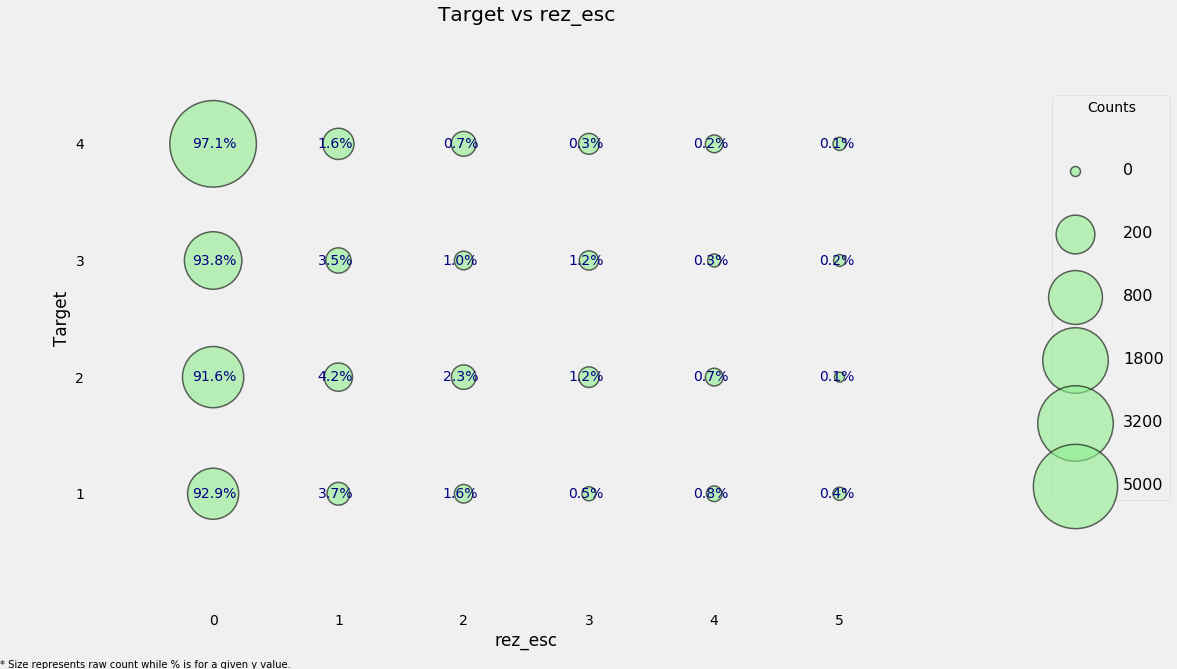

In [31]:
plot_categoricals('rez_esc', 'Target', data);

마커의 크기는 원시 카운트를 나타낸다. 그래프를 읽으려면 지정된 y-값을 선택한 다음 행에서 읽으십시오. 예를 들어 빈곤 수준이 1인 개인의 93%는 총 800명 내외로 1년 뒤처지지 않고 있으며 약 0.4%는 5년 뒤처져 이 범주에 속하는 50여 명이 있다. 이 plot은 전체 카운트와 범주 내 비율 모두를 보여주려고 한다; 완벽하지는 않지만, 나는 그것을 시도해 보았다!

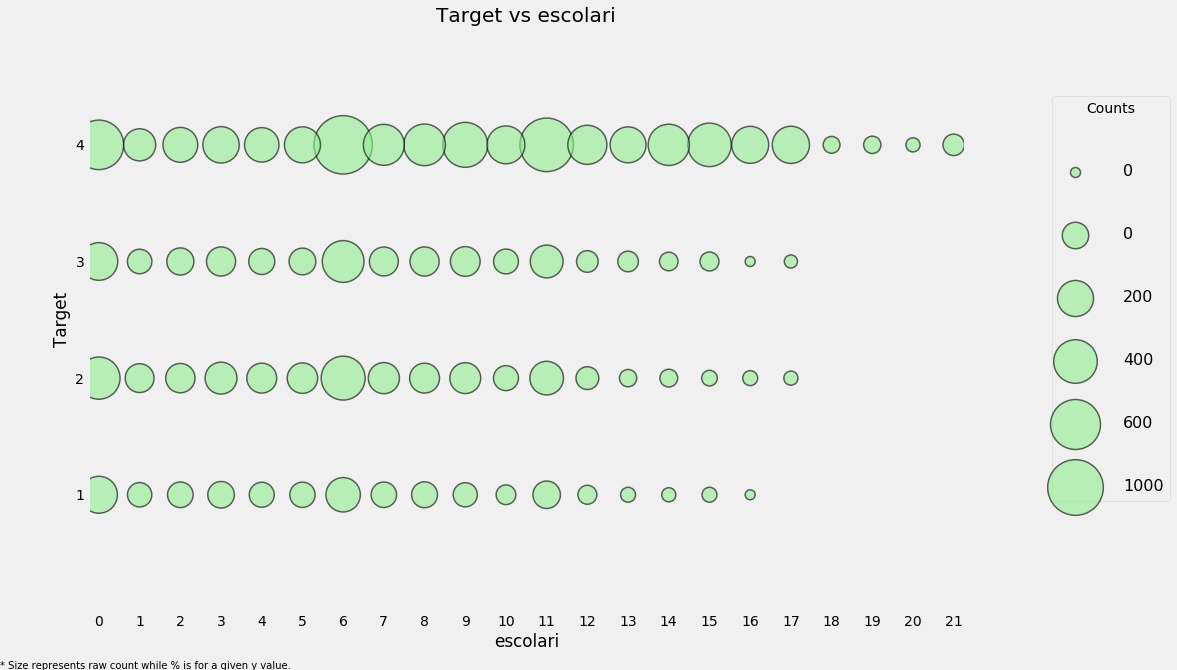

In [32]:
plot_categoricals('escolari', 'Target', data, annotate = False)

각 열의 나머지 결측값은 imputation이라고 알려진 프로세스인 입력된다. 일반적으로 사용되는 imputation에는 여러 가지 유형이 있으며, 가장 단순하고 효과적인 방법 중 하나는 결측값을 열의 중앙값으로 채우는 것이다.

결측값의 마지막 단계로서, 이러한 값들 중 하나가 결측된 경우에 대한 목표값의 분포를 그림으로 그릴 수 있다.

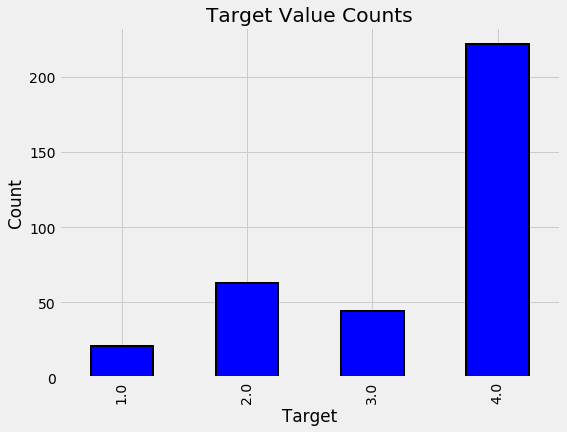

In [33]:
plot_value_counts(data[(data['rez_esc-missing'] == 1)], 
                  'Target')

여기 분포는 전체 데이터에 대한 분포와 일치하는 것 같다.

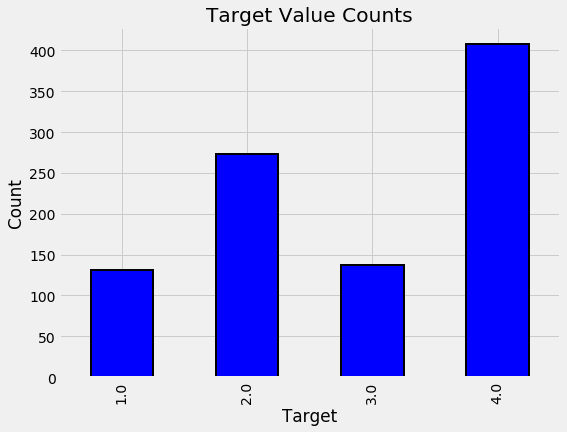

In [34]:
plot_value_counts(data[(data['v2a1-missing'] == 1)], 
                  'Target')

2에서 다른 값보다 많은 분포를 보인다 : moderate poverty 

이것은 중요한 점을 나타낸다: 때때로 누락된 정보는 주어진 정보만큼 중요하다.

## Feature Engineering 

우리가 할 수 있는 훨씬 더 많은 탐색적 데이터 분석이 있지만, 우선 가계 수준에서 데이터를 통합하는 작업을 해야 한다. 우리는 이미 각 가정에 대한 정보를 가지고 있지만, 교육을 위해서는 각 가정에 대한 모든 정보가 요약되어 있어야 할 것이다. 이것은 집(그룹별)에 있는 개인을 그룹화하고 개별 변수의 집합(agg)을 수행하는 것을 의미한다.

또 다른 노트북에서는 어떻게 하면 자동 기능 엔지니어링을 사용하여 이를 수행할 수 있는지 보여주며, 자동 기능 엔지니어링은 기계 학습 워크플로우의 표준 부분이 되어야 한다. 지금은 수작업으로 이 작업을 계속할 것이지만, 기능 도구에서 자동화된 기능 엔지니어링을 반드시 살펴보십시오

### Column Definitions

때때로 데이터 과학에서 우리는 더러운 손으로 데이터를 파헤치거나 많은 시간이 걸리는 지루한 일을 해야 한다. 이것은 분석의 일부분이다: 우리는 개별 수준과 가구 수준에 있는 열을 데이터 디코드를 사용하여 정의해야 한다. 데이터 설명에서 변수 자체를 검토하는 것 외에 가구 수준의 변수를 식별할 수 있는 다른 방법은 없다. 다만, 나는 이미 너를 위해 이 일을 했으니 복사해서 붙여넣기만 하면 돼!

일부 변수를 다른 방식으로 처리해야 하기 때문에 다른 변수를 정의하겠다. 일단 각 수준에서 변수를 정의하고 나면 필요에 따라 통합 작업을 시작할 수 있다.

그 과정은 다음과 같다.

- 변수를 가구 수준 및 상수 수준으로 구분

- 개별 수준 데이터에 적합한 집계 찾기

순서형 변수는 통계적 집계를 사용할 수 있다.

부울 변수도 집계할 수 있지만 통계량은 더 적음

- 개별 집계를 가구 수준 데이터에 결합

### Define Variable Categories

변수에는 몇 가지 다른 범주가 있다.

- 개별 변수: 가구보다는 각 개인의 특성
부울: 예 또는 아니오(0 또는 1)

순서 이산형: 순서가 있는 정수

- household 변수

부울: 예스 또는 아니오

순서 이산형: 순서가 있는 정수

연속숫자

- 제곱 변수: 데이터의 제곱 변수에서 파생됨
- ID 변수: 데이터를 식별하며 형상으로 사용해서는 안 됨

아래에서는 각 범주의 변수를 수동으로 정의한다. 이것은 약간 지루하지만 또한 필요하다.

In [35]:
id_ = ['Id', 'idhogar', 'Target']

In [36]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']

In [37]:
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [38]:
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

모든 변수를 다 커버했고 하나도 반복하지 않았는지 확인하자.

In [39]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

from collections import Counter

print('There are no repeats: ', np.all(np.array(list(Counter(x).values())) == 1))
print('We covered every variable: ', len(x) == data.shape[1])

There are no repeats:  True
We covered every variable:  True


#### 제곱 변수
첫째, 가장 쉬운 단계: 제곱 변수를 모두 제거한다. 선형 모형이 비선형 관계를 학습하는 데 도움을 줄 수 있기 때문에 때때로 변수는 형상 공학의 일부로 제곱되거나 변환된다. 하지만, 우리는 더 복잡한 모델을 사용할 것이기 때문에, 이 제곱된 기능들은 중복된다. 그것들은 비제곱 버전과 높은 상관관계를 가지고 있기 때문에, 관련 없는 정보를 추가하고 또한 훈련을 느리게 함으로써 실제로 우리의 모델에 해를 끼칠 수 있다.

예를 들어, SQBage 대 연령에 대해 살펴봅시다.

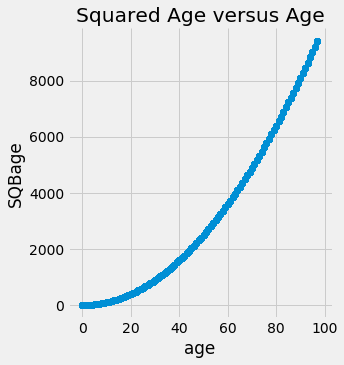

In [40]:
sns.lmplot('age', 'SQBage', data = data, fit_reg=False);
plt.title('Squared Age versus Age');

이 변수들은 상호 연관성이 매우 높으며, 우리는 이 두 변수 모두를 우리의 데이터에 보관할 필요가 없다.

In [41]:
# Remove squared variables
data = data.drop(columns = sqr_)
data.shape

(33413, 136)

### Id Variables
이것들은 매우 간단하다. 우리가 신원 확인을 위해 필요하기 때문에 그것들은 데이터에 있는 그대로 보관될 것이다

### Household Level Variables
먼저 가장에 부분집합한 다음 가구 수준 변수에 대해 살펴보자.

In [42]:
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(10307, 99)

대부분의 가구 수준 변수에 대해, 우리는 단순히 그 변수를 그대로 유지할 수 있다: 각 가구에 대한 예측을 원하기 때문에, 우리는 이러한 변수를 특징으로 사용한다. 그러나 일부 중복 변수를 제거하고 기존 데이터에서 파생된 일부 기능을 추가할 수도 있다.

### Redundant(중복, 쓸모없는) Household Variables
모든 가계 변수의 상관관계를 살펴보자. 너무 높은 상관 관계가 있는 변수가 있으면 상관 관계가 높은 변수 쌍 중 하나를 제거하십시오.

다음 코드는 0.95 이상의 절대 크기 상관 관계를 갖는 변수를 식별한다.

In [43]:
# Create correlation matrix
corr_matrix = heads.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

These show one out of each pair of correlated variables. To find the other pair, we can subset the corr_matrix

소스 TTSCopyTranslate
이러한 변수들은 각각의 상관 변수 쌍들 중 하나를 보여준다. 다른 쌍을 찾으려면 corr_matrix를 부분 집합으로 만들 수 있다

In [44]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

r4t3    tamhog    tamviv    hhsize  hogar_total
r4t3         1.000000  0.998287  0.910457  0.998287     0.998287
tamhog       0.998287  1.000000  0.909155  1.000000     1.000000
tamviv       0.910457  0.909155  1.000000  0.909155     0.909155
hhsize       0.998287  1.000000  0.909155  1.000000     1.000000
hogar_total  0.998287  1.000000  0.909155  1.000000     1.000000

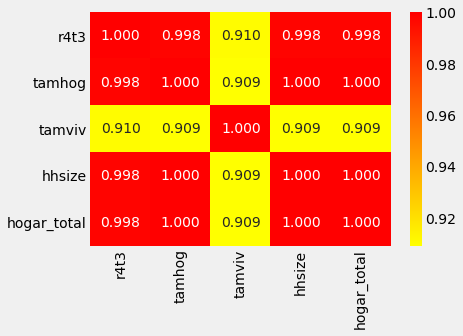

In [45]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f');

여기에는 집의 크기와 관련된 몇 가지 변수가 있다.

- r4t3, 가구원 총합계
- tamhog, 가구 규모
- tamviv, 가구원 수
- hhsize, 가구 사이즈
- hogar_total, 전체 가구원 수

이 변수들은 모두 서로 높은 상관관계를 가지고 있다. 실제로 hhsize는 tamhog 및 hogar_total과 완벽한 상관관계를 가지고 있다. 정보가 중복되기 때문에 우리는 이 두 변수를 제거할 것이다. r4t3는 hhsize와 거의 완벽한 상관관계가 있기 때문에 제거할 수도 있다.

tamviv가 hhsize와 반드시 같은 것은 아니다. 왜냐하면 집에 살지 않는 가족이 있을 수 있기 때문이다. 이 차이를 산점도에서 시각화하자.

In [46]:
heads = heads.drop(columns = ['tamhog', 'hogar_total', 'r4t3'])

C:\Users\Itshony\Anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


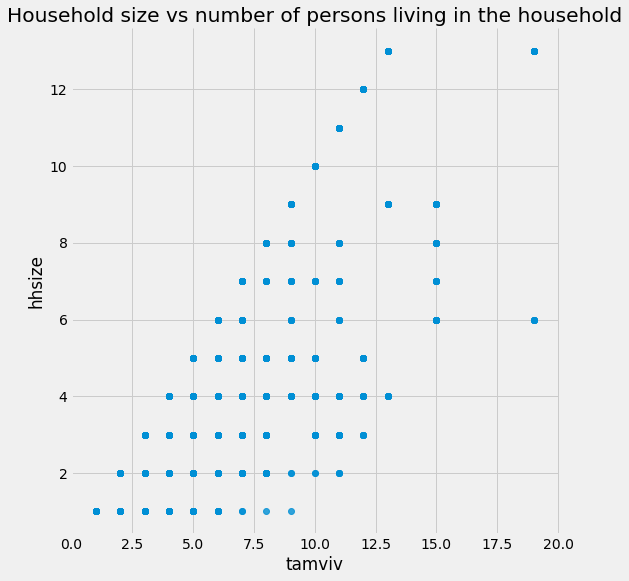

In [47]:
sns.lmplot('tamviv', 'hhsize', data, fit_reg=False, size = 8);
plt.title('Household size vs number of persons living in the household');

우리는 몇 가지 경우를 보면, 가족보다 더 많은 사람들이 그 집에 살고 있다. 이것은 우리에게 새로운 특징, 즉 이 두 측정값의 차이점에 대한 좋은 아이디어를 준다!

이 새로운 기능을 만들어 봅시다.

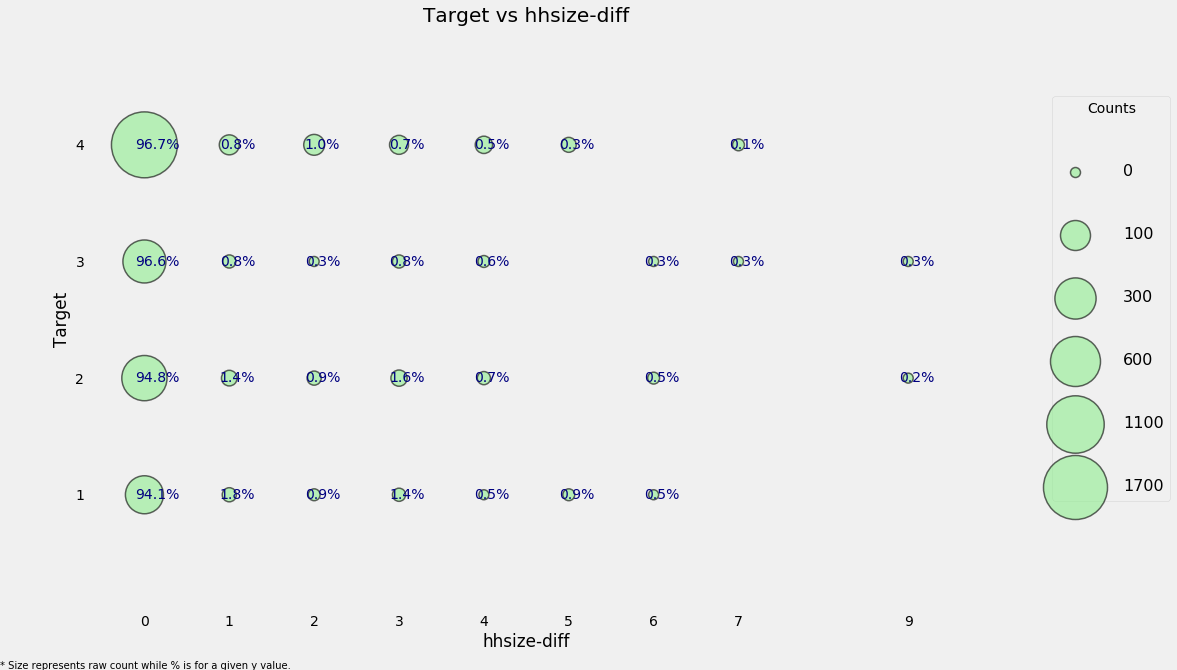

In [48]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

대부분의 가구는 차이가 없는데도 가구원보다 가구원이 더 많은 사람이 있다.

다른 중복 변수로 넘어가자. 먼저 우리는 coopele을 볼 수 있다.

In [49]:
corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs() > 0.9]

public   coopele
public   1.000000 -0.967759
coopele -0.967759  1.000000

이 변수들은 가정의 전기가 어디에서 오는지를 나타낸다. 네 가지 옵션이 있는데, 이 두 가지 옵션 중 하나를 가지고 있지 않은 가정은 전기(노일렉)가 없거나 개인 공장(플랜프리)에서 얻는다.

### Creating Ordinal(순서형) Variable

ordinal 변수를 만들어 이 4개의 변수를 하나로 압축할 겁니다. 내가 직접 지도를 선택할거야 데이터 규약을 근거로 말이야

0: No electricity

1: Electricity from cooperative

2: Electricity from CNFL, ICA, ESPH/JASEC

3: Electricity from private plant


순서가 정해진 변수는 고유의 순서가 있으며, 이를 위해 도메인 지식을 바탕으로 우리 자신의 순서를 선택한다. 우리가 이 새로운 주문 변수를 만든 후에, 우리는 다른 4개의 변수를 떨어뜨릴 수 있다. 여기에 변수가 없는 가구가 여러 가구 있어서 나노(귀책시 기재될 것)를 사용하고 이 변수에 대한 대책이 없었다는 부울란을 추가하겠다.

In [50]:
elec = []

# Assign values
for i, row in heads.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)
        
# Record the new variable and missing flag
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

# Remove the electricity columns
# heads = heads.drop(columns = ['noelec', 'coopele', 'public', 'planpri'])

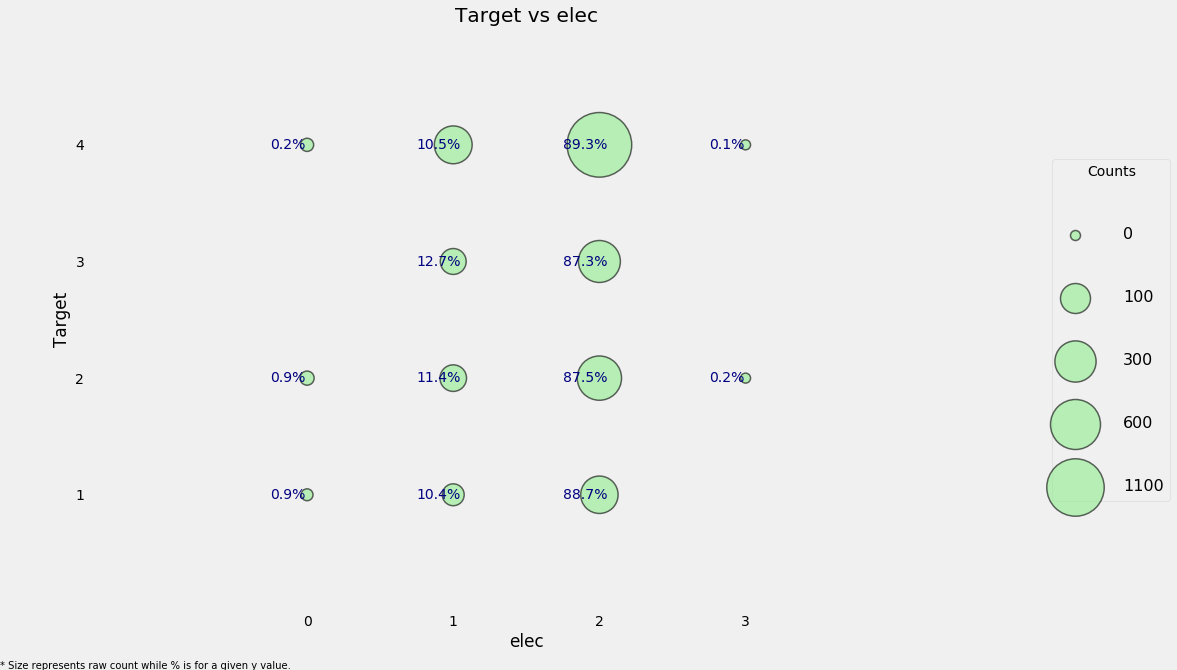

In [51]:
plot_categoricals('elec', 'Target', heads)

우리는 target의 모든 value에 대해, 가장 일반적인 전기 공급원은 열거된 공급자들 중 한 사람으로부터 온 것임을 알 수 있다.

최종 중복 컬럼은 영역2이다. 이것은 그 집이 시골 지역에 있다는 것을 의미하지만, 우리는 그 집이 도시 지역에 있는지를 나타내는 column을 가지고 있기 때문에 그것은 불필요하다. 그러므로 우리는 이 칼럼을 떨어뜨릴 수 있다.

In [52]:
heads = heads.drop(columns = 'area2')

heads.groupby('area1')['Target'].value_counts(normalize = True)

area1  Target
0      4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1      4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

도시지역(가치 1)의 가구가 농촌지역(가치 0)의 가구보다 빈곤수준이 낮을 가능성이 높은 것으로 보인다.

### Creating Ordinal Variables

집의 벽, 지붕, 바닥에는 각각 '나쁨'을 나타내는 첫 번째 column, 두 번째 '정규', 세 번째 '양호'의 세 개의 column이 있다. 우리는 그 변수를 booleans 둘 수도 있지만, 내게는 그 변수를 순서형 변수로 바꾸는 것이 더 이치에 맞는다. 왜냐하면 거기에는 내재된 순서가 있기 때문이다: 나쁜 < 규칙적인 < 좋은 이다. 이를 위해 np.argmax를 사용하여 각 가구에 대해 0이 아닌 열을 간단히 찾을 수 있다.

일단 서수 변수를 생성하면 원래 변수를 삭제할 수 있다.

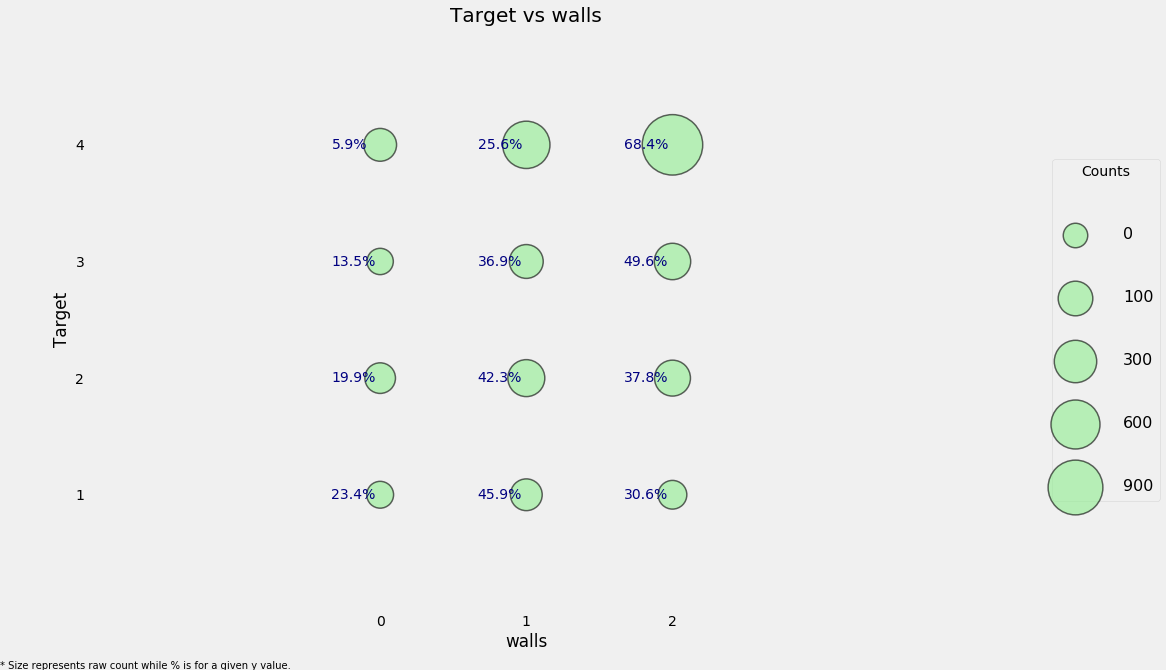

In [53]:
# Wall ordinal variable
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]),
                           axis = 1)

# heads = heads.drop(columns = ['epared1', 'epared2', 'epared3'])
plot_categoricals('walls', 'Target', heads)

In [54]:
# Roof ordinal variable
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),
                           axis = 1)
heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

# Floor ordinal variable
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]),
                           axis = 1)
# heads = heads.drop(columns = ['eviv1', 'eviv2', 'eviv3'])

## Feature Construction (변수 생성)

변수를 순서형 형상에 매핑하는 것 외에도, 형상 구성으로 알려진 기존 데이터로부터 완전히 새로운 형상을 만들 수도 있다. 예를 들어, 우리가 방금 만든 앞의 세 가지 특징을 합산해 집 구조물의 질을 전반적으로 측정할 수 있다.

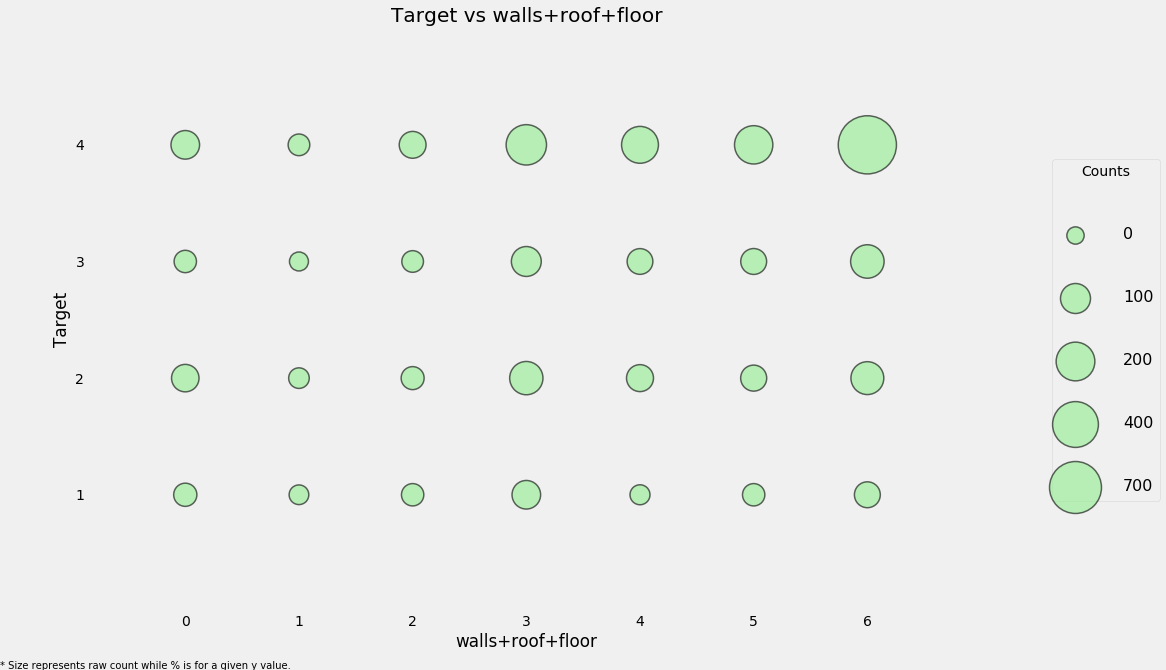

In [55]:
# Create new feature
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']

plot_categoricals('walls+roof+floor', 'Target', heads, annotate=False)

이 새로운 특징은 4의 목표치(최저 빈곤 수준)가 '주택 품질' 변수의 더 높은 가치를 갖는 경향이 있는 것처럼 보이기 때문에 유용할 수 있다. 우리는 또한 이것을 테이블에서 보고 세부사항을 얻을 수 있다.

In [56]:
counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(normalize = True)).rename(columns = {'Target': 'Normalized Count'}).reset_index()
counts.head()

walls+roof+floor  Target  Normalized Count
0                 0     4.0          0.376404
1                 0     2.0          0.320225
2                 0     1.0          0.162921
3                 0     3.0          0.140449
4                 1     4.0          0.323529

다음 변수는 집의 질에 대한 경고가 될 것이다. 화장실, 전기, 바닥, 수도, 천장 없는 경우 각각 -1점씩 마이너스 값이 될 것이다.

In [57]:
# No toilet, no electricity, no floor, no water service, no ceiling
heads['warning'] = 1 * (heads['sanitario1'] + 
                         (heads['elec'] == 0) + 
                         heads['pisonotiene'] + 
                         heads['abastaguano'] + 
                         (heads['cielorazo'] == 0))

우리는 이러한 관계를 시각화하기 위해 우리의 플롯_카테고리컬 함수를 계속 사용할 수 있지만, seaborn 또한 범주형들과 함께 작동할 수 있는 많은 플롯 옵션을 가지고 있다. 하나는 Y축에 변수의 분포를 나타내는 violinp 플롯이며, 각 플롯의 너비는 해당 범주의 관측치 수를 보여준다.

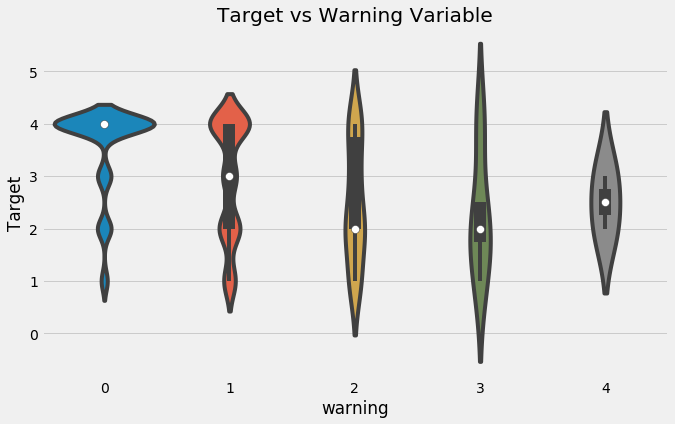

In [58]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'warning', y = 'Target', data = heads);
plt.title('Target vs Warning Variable');

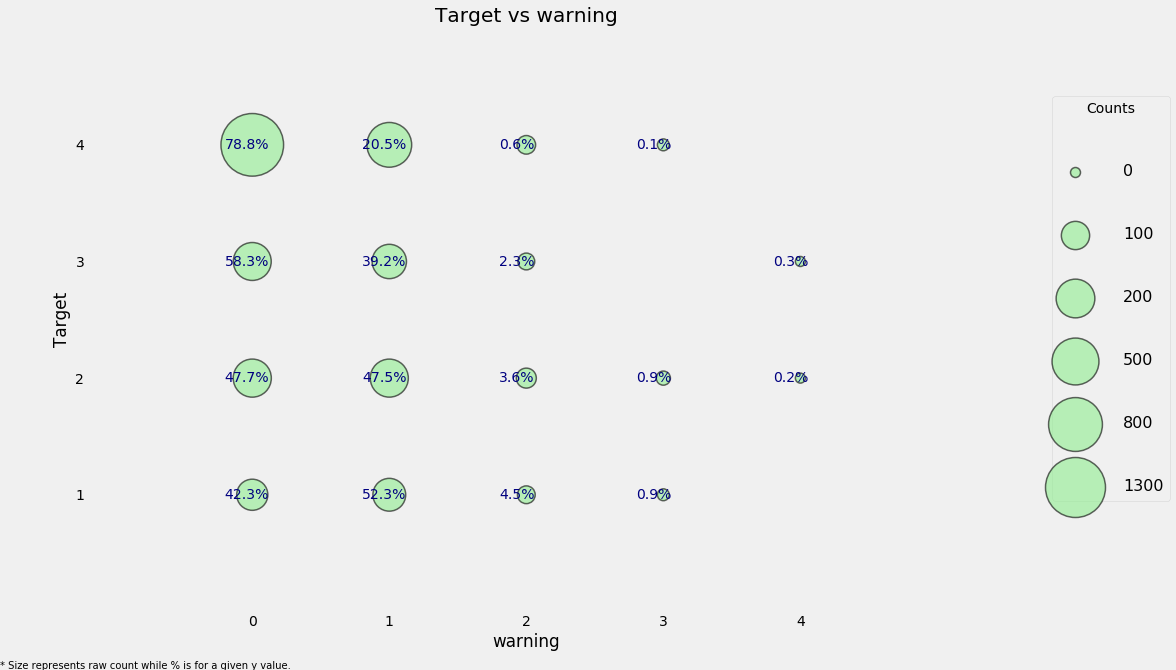

In [59]:
plot_categoricals('warning', 'Target', data = heads)

여기서 바이올린 플롯은 표적이 실제보다 작고 큰 가치를 가질 수 있는 것처럼 보이는 효과로 범주형 변수를 부드럽게 풀어주기 때문에 훌륭하지 않다. 그럼에도 불구하고, 우리는 경고 표시가 없고 빈곤 수준이 가장 낮은 가정의 밀집도를 볼 수 있다. 이것은 유용한 기능인 것 같지만, 모델링을 하기 전에는 확실히 알 수 없다.

현재 우리가 만들 수 있는 마지막 가계 특성은 한 가족이 냉장고, 컴퓨터, 태블릿 또는 텔레비전을 갖는 것에 대해 포인트를 얻는 보너스다.

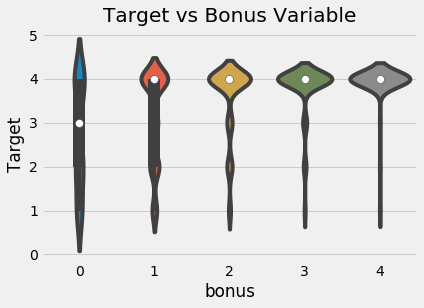

In [60]:
# Owns a refrigerator, computer, tablet, and television
heads['bonus'] = 1 * (heads['refrig'] + 
                      heads['computer'] + 
                      (heads['v18q1'] > 0) + 
                      heads['television'])

sns.violinplot('bonus', 'Target', data = heads,
                figsize = (10, 6));
plt.title('Target vs Bonus Variable');

## Per Capita Features (1인당 특성)

추가 기능은 가구원 개개인의 특정 측정 횟수를 계산할 수 있다.

In [61]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

## Exploring Household Variables

우리의 피쳐를 정리하는 데 온갖 수고를 다 겪은 후, 이제 우리는 타겟과 관련하여 피쳐를 살펴볼 수 있게 되었다. 우리는 이미 이 일을 조금 했지만, 이제 우리는 관계를 수량화하려고 노력할 수 있다.

관계 측정
두 변수 사이의 관계를 측정하는 방법에는 여러 가지가 있다. 여기서 다음 중 두 가지를 살펴보겠다.

- Pearson 상관 관계: -1부터 1까지 두 변수 사이의 선형 관계 측정
- Spearman 상관 관계: -1부터 1까지 두 변수 사이의 단조로운 관계 측정

Spearman 상관관계는 한 변수가 증가하면 다른 변수가 증가하면 관계가 선형적이지 않더라도 1이다. 반면에 피어슨 상관관계는 증가가 정확히 선형일 경우에만 하나가 될 수 있다. 이것들은 예시로 가장 잘 설명되어 있다.

In [62]:
from scipy.stats import spearmanr

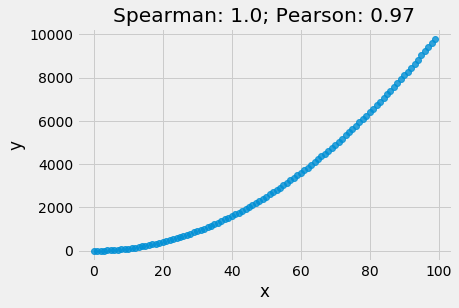

In [63]:
def plot_corrs(x, y):
    """Plot data and show the spearman and pearson correlation."""
    
    # Calculate correlations
    spr = spearmanr(x, y).correlation
    pcr = np.corrcoef(x, y)[0, 1]
    
    # Scatter plot
    data = pd.DataFrame({'x': x, 'y': y})
    plt.figure( figsize = (6, 4))
    sns.regplot('x', 'y', data = data, fit_reg = False);
    plt.title(f'Spearman: {round(spr, 2)}; Pearson: {round(pcr, 2)}');
x = np.array(range(100))
y = x ** 2

plot_corrs(x, y)

Spearman 상관관계는 종종 Target 또는 교육 연도와 같은 순서형 변수에 더 나은 것으로 간주된다. 실제 세계에서 대부분의 관계 중심은 선형적이지 않으며, Pearson 상관관계는 두 변수가 얼마나 연관되어 있는지에 대한 근사치가 될 수 있지만, 그것은 부정확하며 최선의 비교 방법은 아니다.

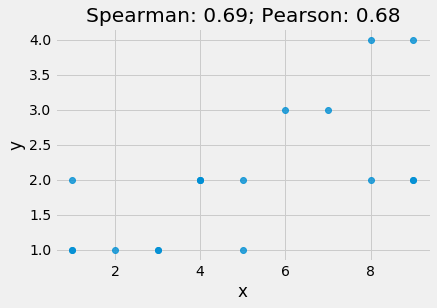

In [64]:
x = np.array([1, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9])
y = np.array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 2, 4, 2, 2, 4])

plot_corrs(x, y)

대부분의 경우, 그 값은 매우 비슷하다.

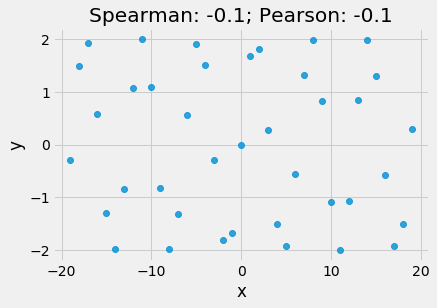

In [65]:
x = np.array(range(-19, 20))
y = 2 * np.sin(x)

plot_corrs(x, y)

먼저 목표값과 모든 변수의 Pearson 상관 관계를 계산해 보십시오.

In [66]:
# Use only training data
train_heads = heads.loc[heads['Target'].notnull(), :].copy()

pcorrs = pd.DataFrame(train_heads.corr()['Target'].sort_values()).rename(columns = {'Target': 'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns = {'index': 'feature'})

print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

Most negatively correlated variables:
        feature     pcorr
0       warning -0.301791
1     hogar_nin -0.266309
2          r4t1 -0.260917
3  overcrowding -0.234954
4         eviv1 -0.217908

Most positively correlated variables:
               feature     pcorr
97   phones-per-capita  0.299026
98               floor  0.307605
99    walls+roof+floor  0.332446
100           meaneduc  0.333652
101             Target  1.000000


부정적인 상관관계의 경우, 변수를 증가시킬수록, 빈곤의 심각성이 증가함을 나타내는 목표가 감소한다. 따라서, 경고가 증가함에 따라, 빈곤 수준 또한 증가하는데, 이것은 집에 대한 잠재적인 나쁜 징후를 보여주기 위한 것이기 때문이다. hogar_nin은 가족의 0 - 19명의 아이들의 숫자인데, 또한 말이 된다: 어린 아이들은 더 높은 수준의 가난을 초래하는 가정의 경제적 스트레스의 원천이 될 수 있다. 또는 사회경제적 지위가 낮은 가정은 그들 중 한 명이 성공할 수 있기를 바라는 마음에서 더 많은 아이들을 낳는다. 설명이 어떻든 간에, 가족의 크기와 빈곤 사이에는 진정한 연관성이 있다.

반면, 긍정적인 상관관계의 경우, 값이 높을수록 빈곤의 심각성이 감소한다는 것을 나타내는 목표값이 더 높다는 것을 의미한다. 가장 높은 상관관계가 있는 가구수준 변수는 가구 내 성인의 평균 교육수준인 평균교육이다. 교육과 빈곤 사이의 이러한 관계는 직관적으로 타당하다: 더 높은 수준의 교육은 일반적으로 더 낮은 수준의 빈곤과 관련이 있다. 우리는 어떤 원인이 어떤 것인지 반드시 알지는 못하지만, 이것들이 같은 방향으로 움직이는 경향이 있다는 것을 알고 있다.

상관관계 값에 대한 일반적인 지침은 다음과 같으나, 이러한 지침은 누구에게 요청하느냐(이들에 대한 출처)에 따라 변경된다.

- 00-19 "매우 약함"
- .20-.39 "weak"
- .40-.59 "moderate"
- .60-.79 "강력"
- .80-1.0 "매우 강함"

이러한 상관관계가 보여주는 것은 우리의 모델이 기능에서 타겟으로의 매핑을 배우기 위해 사용할 수 있는 몇몇 약한 관계가 있다는 것이다.

이제 우리는 스피어맨 상관관계로 넘어갈 수 있다.

In [67]:
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

feats = []
scorr = []
pvalues = []

# Iterate through each column
for c in heads:
    # Only valid for numbers
    if heads[c].dtype != 'object':
        feats.append(c)
        
        # Calculate spearman correlation
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)

scorrs = pd.DataFrame({'feature': feats, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')

또한 Spearman 상관 계수 계산에는 관계의 유의 수준을 나타내는 pvalue가 함께 제공된다. 0.05보다 작은 p값은 일반적으로 유의한 것으로 간주되지만, 다중 비교를 수행하고 있으므로 p-값을 Bonferroni 보정이라고 알려진 공정인 비교 횟수로 나누고자 한다.`

In [68]:
print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

Most negative Spearman correlations:
       feature     scorr        pvalue
97     warning -0.307326  4.682829e-66
68  dependency -0.281516  2.792620e-55
85   hogar_nin -0.236225  5.567218e-39
80        r4t1 -0.219226  1.112230e-33
49       eviv1 -0.217803  2.952571e-33

Most positive Spearman correlations:
              feature     scorr        pvalue
23          cielorazo  0.300996  2.611808e-63
95              floor  0.309638  4.466091e-67
99  phones-per-capita  0.337377  4.760104e-80
96   walls+roof+floor  0.338791  9.539346e-81
0              Target  1.000000  0.000000e+00


대부분의 경우 상관관계를 계산하는 두 가지 방법이 일치한다. 단지 호기심에서 우리는 가장 멀리 떨어져 있는 가치들을 찾을 수 있다.

In [69]:
corrs = pcorrs.merge(scorrs, on = 'feature')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']

corrs.sort_values('diff').head()

feature     pcorr     scorr        pvalue      diff
77    rooms-per-capita  0.152185  0.223303  6.521453e-35 -0.071119
85               v18q1  0.197493  0.244200  1.282664e-41 -0.046708
87  tablets-per-capita  0.204638  0.248642  3.951568e-43 -0.044004
2                 r4t1 -0.260917 -0.219226  1.112230e-33 -0.041691
97   phones-per-capita  0.299026  0.337377  4.760104e-80 -0.038351

In [70]:
corrs.sort_values('diff').dropna().tail()

feature     pcorr     scorr        pvalue      diff
57    techozinc  0.014357  0.003404  8.528369e-01  0.010954
49  hogar_mayor -0.025173 -0.041722  2.290994e-02  0.016549
88       edjefe  0.235687  0.214736  2.367521e-32  0.020951
66       edjefa  0.052310  0.005114  7.804715e-01  0.047197
17   dependency -0.126465 -0.281516  2.792620e-55  0.155051

상관관계에서 가장 큰 불일치는 의존성이다. 우리는 관계를 시각화하기 위해 목표 대 종속성의 산점도를 만들 수 있다. 이 두 변수 모두 이산형 변수들이기 때문에 우리는 그림에 jittering을 조금 추가할 것이다.

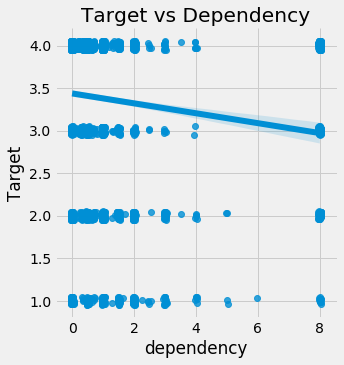

In [71]:
sns.lmplot('dependency', 'Target', fit_reg = True, data = train_heads, x_jitter=0.05, y_jitter=0.05);
plt.title('Target vs Dependency');

관계를 보기는 어렵지만 약간 부정적이다. 의존도가 높아질수록 대상의 가치는 낮아진다. 이것은 말이 된다: 의존성은 의존적인 개인의 수를 의존하지 않는 사람의 수로 나눈 것이다. 우리가 이 가치를 증가시킬수록 빈곤분열은 증가하는 경향이 있다: 더 많은 의존적인 가족 구성원을 갖는 것은 그들이 의존하지 않는 가족 구성원에 의해 부양되어야 하기 때문에 더 높은 수준의 빈곤으로 이어진다.

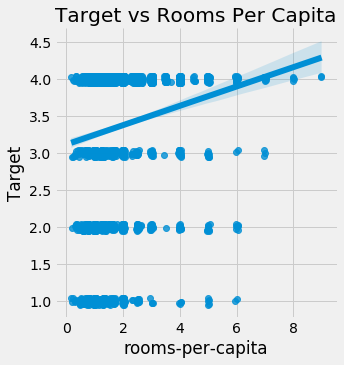

In [72]:
sns.lmplot('rooms-per-capita', 'Target', fit_reg = True, data = train_heads, x_jitter=0.05, y_jitter=0.05);
plt.title('Target vs Rooms Per Capita');

### Correlation Heatmap
내가 가장 좋아하는 그림 중 하나는 상관 열 지도인데, 그것은 하나의 이미지에 많은 정보를 보여주기 때문이다. 열 지도는 7개의 변수를 선택하여 자신과 목표값 사이의 상관 관계를 보여 주겠다.

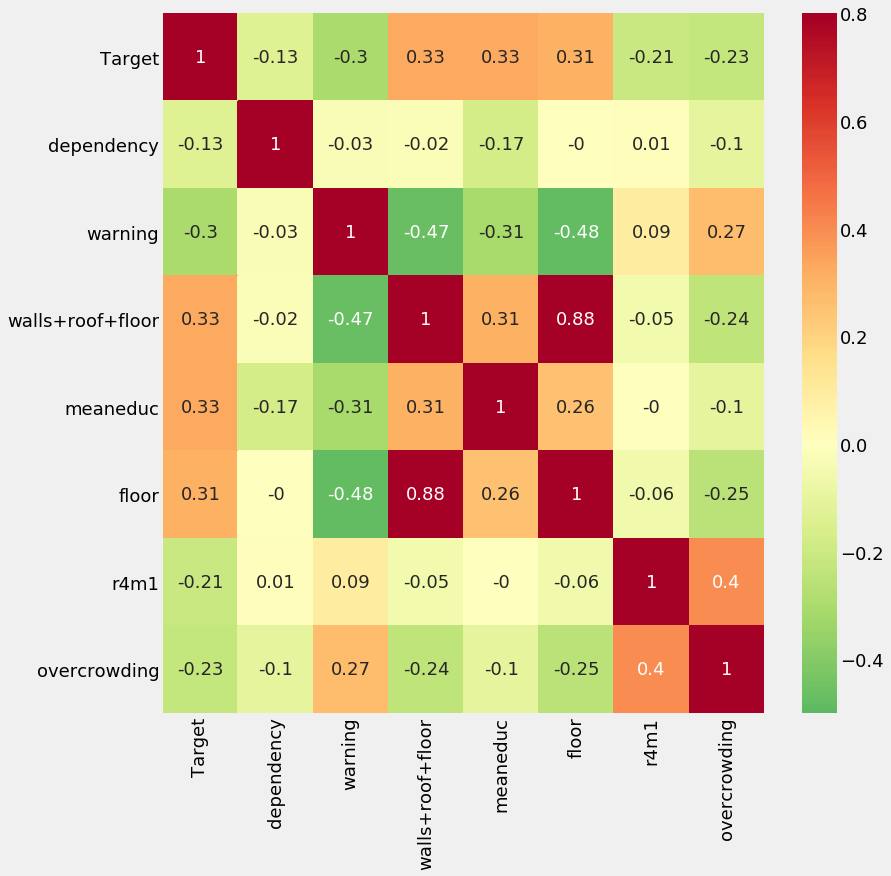

In [73]:
variables = ['Target', 'dependency', 'warning', 'walls+roof+floor', 'meaneduc',
             'floor', 'r4m1', 'overcrowding']

# Calculate the correlations
corr_mat = train_heads[variables].corr().round(2)

# Draw a correlation heatmap
plt.rcParams['font.size'] = 18
plt.figure(figsize = (12, 12))
sns.heatmap(corr_mat, vmin = -0.5, vmax = 0.8, center = 0, 
            cmap = plt.cm.RdYlGn_r, annot = True);

이 그래프는 목표값과의 상관관계가 약한 변수가 많다는 것을 보여준다. 또한 일부 변수(바닥과 벽+지붕+바닥 등) 간의 상관관계가 높으며, 이는 공선성으로 인해 문제가 될 수 있다.

### Feature Plot 
가계 수준 데이터의 최종 탐구를 위해, 우리는 목표값과 가장 상관관계가 있는 변수들 중 몇 가지를 그래프로 만들 수 있다. 이것은 위쪽 삼각형의 산점도, 대각선의 커널 밀도 추정치(kde) 그림, 아래쪽 삼각형의 2D KDE 그림을 보여준다.

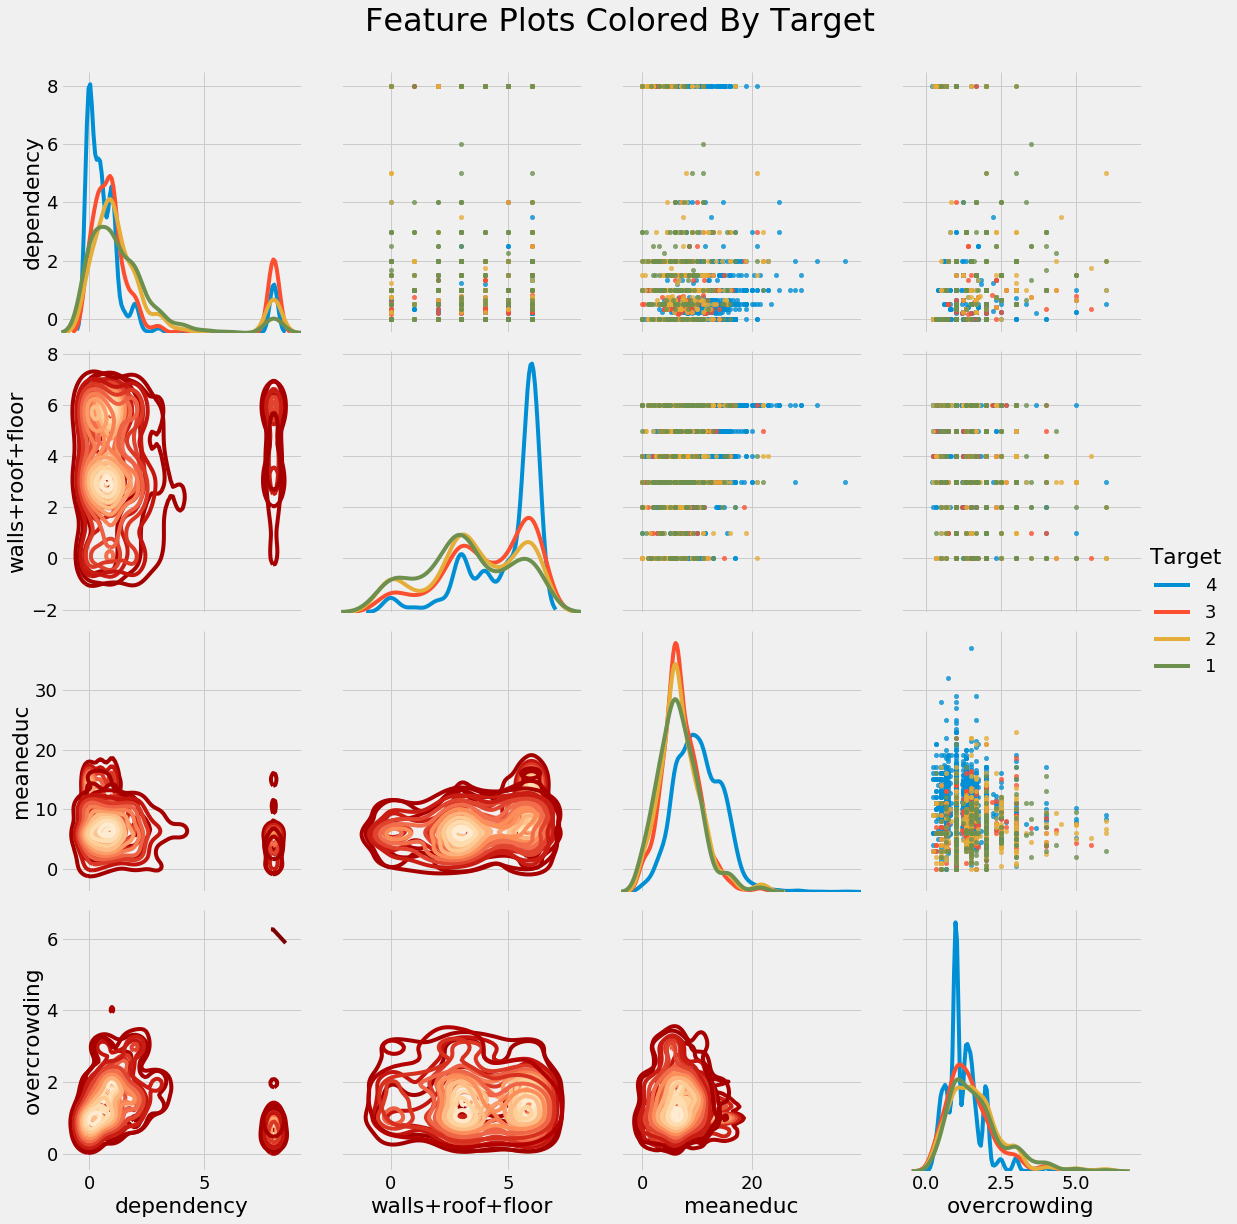

In [74]:
import warnings
warnings.filterwarnings('ignore')

# Copy the data for plotting
plot_data = train_heads[['Target', 'dependency', 'walls+roof+floor',
                         'meaneduc', 'overcrowding']]

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 4, diag_sharey=False,
                    hue = 'Target', hue_order = [4, 3, 2, 1], 
                    vars = [x for x in list(plot_data.columns) if x != 'Target'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.8, s = 20)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);
grid = grid.add_legend()
plt.suptitle('Feature Plots Colored By Target', size = 32, y = 1.05);

당분간은 가계 변수의 특성 공학을 떠나겠다. 나중에 모델 퍼포먼스가 마음에 들지 않으면 이 단계로 돌아올 수 있다.

In [75]:
household_feats = list(heads.columns)

## Individual Level Variables

개별 수준 변수에는 두 가지 유형이 있다. 부울(참 또는 거짓의 경우 1 또는 0) 및 순서(의미 있는 순서가 있는 값 제외)

In [76]:
ind = data[id_ + ind_bool + ind_ordered]
ind.shape

(33413, 40)

### Redundant Individual Variables

가계 수준 변수와 동일한 프로세스를 수행하여 중복된 개별 변수를 식별할 수 있다. 상관 계수의 절대 크기가 0.95보다 큰 변수에 초점을 맞출 겁니다.

In [77]:
# Create correlation matrix
corr_matrix = ind.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

This is simply the opposite of male! We can remove the male flag.

In [78]:
ind = ind.drop(columns = 'male')

### Creating Ordinal Variables

가계 수준 데이터를 사용한 것과 마찬가지로, 기존 열을 순서형 변수에 매핑할 수 있다. 여기서는 개인이 가지고 있는 교육의 양을 나타내는 instlevel_ 변수에 초점을 맞출 것이다. instlevel1: 교육 수준 없음 - instlevel9: 대학원 교육.

순서 변수를 생성하려면 각 개인에 대해 단순히 0이 아닌 열을 찾으십시오. 교육은 고유의 순서(더 높은 것이 좋다)를 가지고 있기 때문에 이러한 순서변수로의 전환은 문제 맥락에서 타당하다.

In [79]:
ind[[c for c in ind if c.startswith('instl')]].head()

instlevel1  instlevel2  instlevel3  instlevel4  instlevel5  instlevel6  \
0           0           0           0           1           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           1           0   
3           0           0           0           1           0           0   
4           0           0           0           0           1           0   

   instlevel7  instlevel8  instlevel9  
0           0           0           0  
1           0           1           0  
2           0           0           0  
3           0           0           0  
4           0           0           0

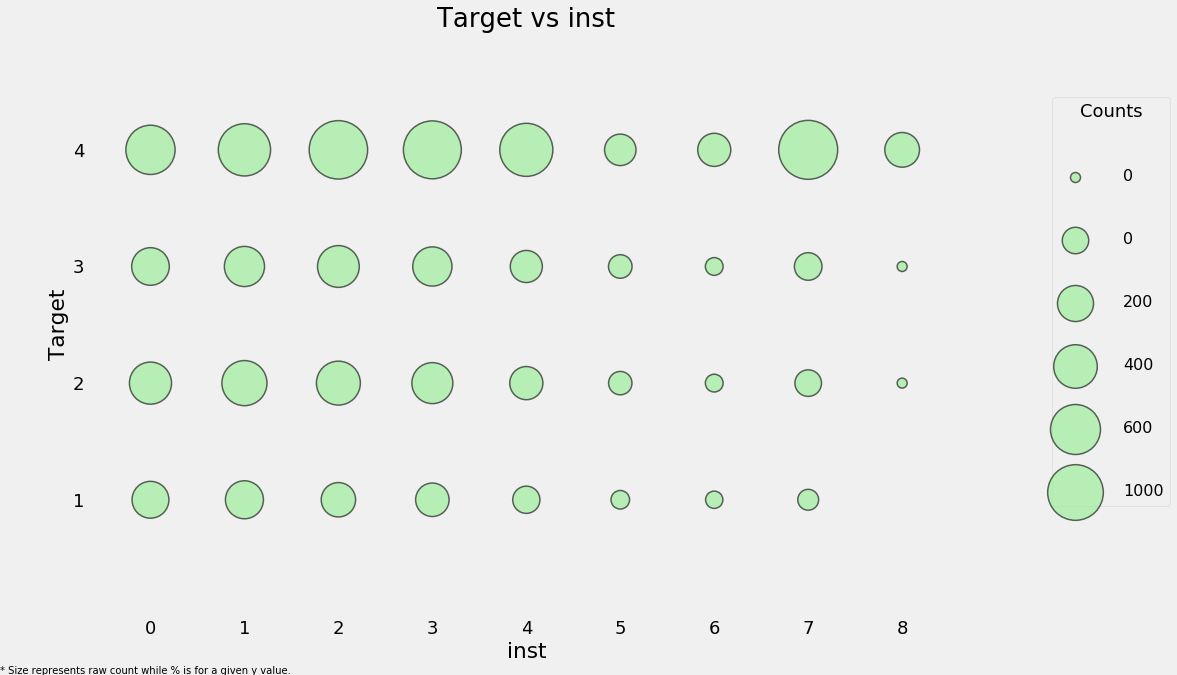

In [80]:
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis = 1)

plot_categoricals('inst', 'Target', ind, annotate = False);

교육 수준이 높을수록 빈곤 수준이 낮아지는 것 같다. 하지만 우리는 이것이 개별적인 수준이라는 것을 명심할 필요가 있고 우리는 결국 이 데이터를 가계 수준에서 집계해야 할 것이다.

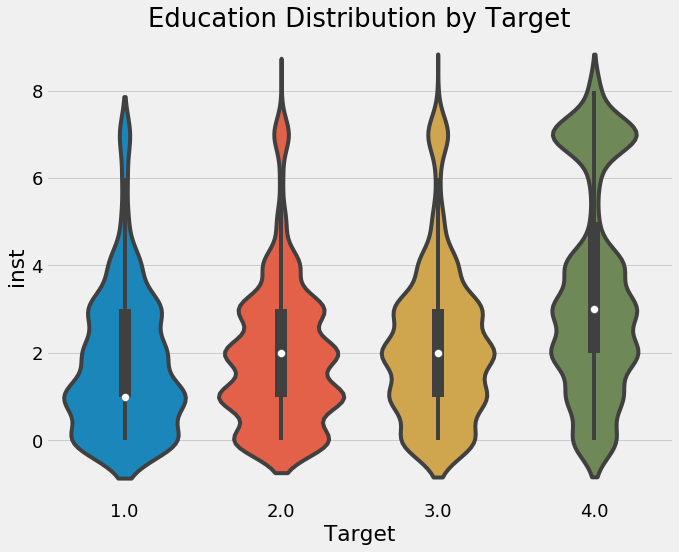

In [81]:
plt.figure(figsize = (10, 8))
sns.violinplot(x = 'Target', y = 'inst', data = ind);
plt.title('Education Distribution by Target');

In [82]:
# Drop the education columns
# ind = ind.drop(columns = [c for c in ind if c.startswith('instlevel')])
ind.shape

(33413, 40)

### Feature Construction
We can make a few features using the existing data. For example, we can divide the years of schooling by the age

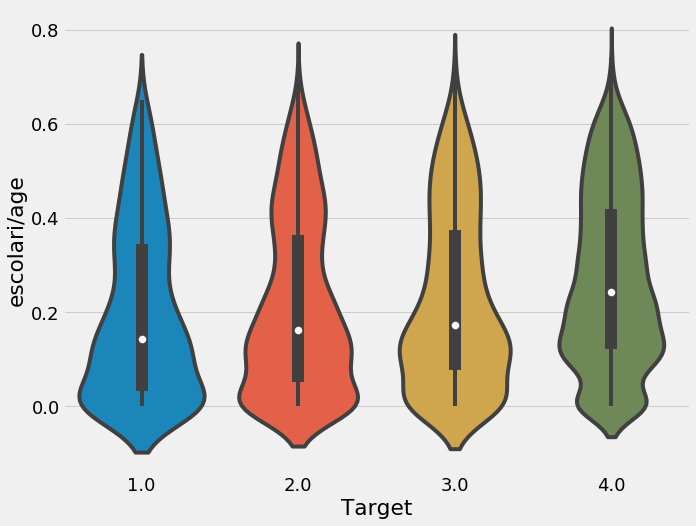

In [83]:
ind['escolari/age'] = ind['escolari'] / ind['age']

plt.figure(figsize = (10, 8))
sns.violinplot('Target', 'escolari/age', data = ind);

우리는 또한 우리의 새로운 변수, 즉, 이것을 나이별로 나눌 수 있다. 테크놀로지의 마지막 변수는 태블릿과 휴대전화의 결합을 나타내는 겁니다. 휴대폰의 결합을 나타낸다.

In [84]:
ind['inst/age'] = ind['inst'] / ind['age']
ind['tech'] = ind['v18q'] + ind['mobilephone']
ind['tech'].describe()

count    33413.000000
mean         1.214886
std          0.462567
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: tech, dtype: float64

## Feature Engineering through Aggregations

개별 데이터를 가계 데이터에 통합하려면 가구별로 집계해야 한다. 이렇게 하는 가장 간단한 방법은 가족 idhogar를 그룹화한 다음 데이터를 수집하는 것이다. 순서형 또는 연속형 변수에 대한 집계를 위해, 우리는 6개를 사용할 수 있고, 그 중 5개는 판다에게 내장되어 있으며, 그 중 1개는 우리 자신을 범위_로 정의하고 있다. 부울 집계는 동일할 수 있지만, 이것은 우리가 삭제해야 할 많은 중복된 열을 만들 것이다. 이 경우에는 동일한 집계를 사용한 다음 다시 돌아가서 중복 열을 삭제하십시오.

In [85]:
# Define custom function
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'

# Group and aggregate
ind_agg = ind.drop(columns = 'Target').groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])
ind_agg.head()

v18q                           dis                                 \
           min max sum count  std range_ min max sum count       std range_   
idhogar                                                                       
000a08204    1   1   3     3  0.0      0   0   0   0     3  0.000000      0   
000bce7c4    0   0   0     2  0.0      0   0   1   1     2  0.707107      1   
001845fb0    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  0.000000      0   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  0.000000      0   

          female                                estadocivil1                \
             min max sum count       std range_          min max sum count   
idhogar                                                                      
000a08204      0   1   1     3  0.577350      1            0   1   1     3   
000bce7c4      0   1   1     2  0.707107      1            0   0   0     2   
001845fb0      0   1   2     4  0.577350      1            0   0   0     4   
001ff74ca      1   1   2     2  0.000000      0            0   1   1     2   
003123ec2      0   1   1     4  0.500000      1            0   1   2     4   

                           estadocivil2                                \
                std range_          min max sum count      std range_   
idhogar                                                                 
000a08204  0.577350      1            0   1   2     3  0.57735      1   
000bce7c4  0.000000      0            0   0   0     2  0.00000      0   
001845fb0  0.000000      0            0   1   2     4  0.57735      1   
001ff74ca  0.707107      1            0   0   0     2  0.00000      0   
003123ec2  0.577350      1            0   1   2     4  0.57735      1   

          estadocivil3                           estadocivil4                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            1   1   2     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   0   0     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                      estadocivil5                                 \
           std range_          min max sum count       std range_   
idhogar                                                             
000a08204  0.0      0            0   0   0     3  0.000000      0   
000bce7c4  0.0      0            0   0   0     2  0.000000      0   
001845fb0  0.0      0            0   0   0     4  0.000000      0   
001ff74ca  0.0      0            0   1   1     2  0.707107      1   
003123ec2  0.0      0            0   0   0     4  0.000000      0   

          estadocivil6                           estadocivil7                \
                   min max sum count  std range_          min max sum count   
idhogar                                                                       
000a08204            0   0   0     3  0.0      0            0   0   0     3   
000bce7c4            0   0   0     2  0.0      0            0   0   0     2   
001845fb0            0   0   0     4  0.0      0            0   1   2     4   
001ff74ca            0   0   0     2  0.0      0            0   0   0     2   
003123ec2            0   0   0     4  0.0      0            0   0   0     4   

                          parentesco1                                 \
               std range_         min max sum count       std range_   
idhogar                                                                
000a08204  0.00000      0           0   1   1     3  0.577350      1   
000bce7c4  0.00000      0           0   1   1     2  0.70710

그 한 줄만 가지고 30개의 기능에서 180개로. 다음으로 우리는 추적하기 쉽도록 기둥의 이름을 바꿀 수 있다.

In [86]:
# Rename the columns
new_col = []
for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{c}-{stat}')
        
ind_agg.columns = new_col
ind_agg.head()

v18q-min  v18q-max  v18q-sum  v18q-count  v18q-std  v18q-range_  \
idhogar                                                                      
000a08204         1         1         3           3       0.0            0   
000bce7c4         0         0         0           2       0.0            0   
001845fb0         0         0         0           4       0.0            0   
001ff74ca         1         1         2           2       0.0            0   
003123ec2         0         0         0           4       0.0            0   

           dis-min  dis-max  dis-sum  dis-count   dis-std  dis-range_  \
idhogar                                                                 
000a08204        0        0        0          3  0.000000           0   
000bce7c4        0        1        1          2  0.707107           1   
001845fb0        0        0        0          4  0.000000           0   
001ff74ca        0        0        0          2  0.000000           0   
003123ec2        0        0        0          4  0.000000           0   

           female-min  female-max  female-sum  female-count  female-std  \
idhogar                                                                   
000a08204           0           1           1             3    0.577350   
000bce7c4           0           1           1             2    0.707107   
001845fb0           0           1           2             4    0.577350   
001ff74ca           1           1           2             2    0.000000   
003123ec2           0           1           1             4    0.500000   

           female-range_  estadocivil1-min  estadocivil1-max  \
idhogar                                                        
000a08204              1                 0                 1   
000bce7c4              1                 0                 0   
001845fb0              1                 0                 0   
001ff74ca              0                 0                 1   
003123ec2              1                 0                 1   

           estadocivil1-sum  estadocivil1-count  estadocivil1-std  \
idhogar                                                             
000a08204                 1                   3          0.577350   
000bce7c4                 0                   2          0.000000   
001845fb0                 0                   4          0.000000   
001ff74ca                 1                   2          0.707107   
003123ec2                 2                   4          0.577350   

           estadocivil1-range_  estadocivil2-min  estadocivil2-max  \
idhogar                                                              
000a08204                    1                 0                 1   
000bce7c4                    0                 0                 0   
001845fb0                    0                 0                 1   
001ff74ca                    1                 0                 0   
003123ec2                    1                 0                 1   

           estadocivil2-sum  estadocivil2-count  estadocivil2-std  \
idhogar                                                             
000a08204                 2                   3           0.57735   
000bce7c4                 0                   2           0.00000   
001845fb0                 2                   4           0.57735   
001ff74ca                 0                   2           0.00000   
003123ec2                 2                   4           0.57735   

           estadocivil2-range_  estadocivil3-min  estadocivil3-max  \
idhogar                                                              
000a08204                    1                 0                 0   
000bce7c4                    0                 1                 1   
001845fb0                    1                 0                 0   
001ff74ca                    0                 0                 0   
003123ec2                    1                 0                 0   

           estadocivil3-sum

In [87]:
ind_agg.iloc[:, [0, 1, 2, 3, 6, 7, 8, 9]].head()

v18q-min  v18q-max  v18q-sum  v18q-count  dis-min  dis-max  \
idhogar                                                                 
000a08204         1         1         3           3        0        0   
000bce7c4         0         0         0           2        0        1   
001845fb0         0         0         0           4        0        0   
001ff74ca         1         1         2           2        0        0   
003123ec2         0         0         0           4        0        0   

           dis-sum  dis-count  
idhogar                        
000a08204        0          3  
000bce7c4        1          2  
001845fb0        0          4  
001ff74ca        0          2  
003123ec2        0          4

### Feature Selection
형상 선택의 첫 번째 라운드로서, 0.95보다 큰 상관 관계를 가진 변수 쌍 중 하나를 제거할 수 있다.

In [88]:
# Create correlation matrix
corr_matrix = ind_agg.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(f'There are {len(to_drop)} correlated columns to remove.')

There are 111 correlated columns to remove.


column을 떨어뜨린 다음 헤드 데이터와 병합하여 최종 데이터 프레임을 만들 겁니다.

In [89]:
ind_agg = ind_agg.drop(columns = to_drop)
ind_feats = list(ind_agg.columns)

# Merge on the household id
final = heads.merge(ind_agg, on = 'idhogar', how = 'left')

print('Final features shape: ', final.shape)

Final features shape:  (10307, 228)


In [90]:
final.head()

Id    idhogar  Target  hacdor  hacapo  v14a  refrig  paredblolad  \
0  ID_279628684  21eb7fcc1     4.0       0       0     1       1            1   
1  ID_f29eb3ddd  0e5d7a658     4.0       0       0     1       1            0   
2  ID_68de51c94  2c7317ea8     4.0       0       0     1       1            0   
3  ID_ec05b1a7b  2b58d945f     4.0       0       0     1       1            1   
4  ID_1284f8aad  d6dae86b7     4.0       1       0     1       1            1   

   paredzocalo  paredpreb  pisocemento  pareddes  paredmad  paredzinc  \
0            0          0            0         0         0          0   
1            0          0            0         0         1          0   
2            0          0            0         0         1          0   
3            0          0            0         0         0          0   
4            0          0            0         0         0          0   

   paredfibras  paredother  pisomoscer  pisoother  pisonatur  pisonotiene  \
0            0           0           1          0          0            0   
1            0           0           0          0          0            0   
2            0           0           1          0          0            0   
3            0           0           1          0          0            0   
4            0           0           1          0          0            0   

   pisomadera  techozinc  techoentrepiso  techocane  techootro  cielorazo  \
0           0          0               1          0          0          1   
1           1          1               0          0          0          1   
2           0          1               0          0          0          1   
3           0          1               0          0          0          1   
4           0          1               0          0          0          1   

   abastaguadentro  abastaguafuera  abastaguano  public  planpri  noelec  \
0                1               0            0       1        0       0   
1                1               0            0       1        0       0   
2                1               0            0       1        0       0   
3                1               0            0       1        0       0   
4                1               0            0       1        0       0   

   coopele  sanitario1  sanitario2  sanitario3  sanitario5  sanitario6  \
0        0           0           1           0           0           0   
1        0           0           1           0           0           0   
2        0           0           1           0           0           0   
3        0           0           1           0           0           0   
4        0           0           1           0           0           0   

   energcocinar1  energcocinar2  energcocinar3  energcocinar4  elimbasu1  \
0              0              0              1              0          1   
1              0              1              0              0          1   
2              0              1              0              0          1   
3              0              1              0              0          1   
4              0              0              1              0          1   

   elimbasu2  elimbasu3  elimbasu4  elimbasu5  elimbasu6  epared1  epared2  \
0          0          0          0          0          0        0        1   
1          0          0          0          0          0        0        1   
2          0          0          0          0          0        0        1   
3          0          0          0          0          0        0        0   
4          0          0          0          0          0        1        0   

   epared3  eviv1  eviv2  eviv3  tipovivi1  tipovivi2  tipovivi3  tipovivi4  \
0        0      1      0      0          0          0          1          0   
1        0      0      1      0          0          0          1          0   
2        0      0      0      1          1          0          0          0   
3        1      0

### Final Data Exploration

We'll do a little bit of exploration.

In [91]:
corrs = final.corr()['Target']

In [92]:
corrs.sort_values().head()

warning          -0.301791
instlevel2-sum   -0.297868
instlevel1-sum   -0.271204
hogar_nin        -0.266309
r4t1             -0.260917
Name: Target, dtype: float64

In [93]:
corrs.sort_values().dropna().tail()

walls+roof+floor    0.332446
meaneduc            0.333652
inst-max            0.368229
escolari-max        0.373091
Target              1.000000
Name: Target, dtype: float64

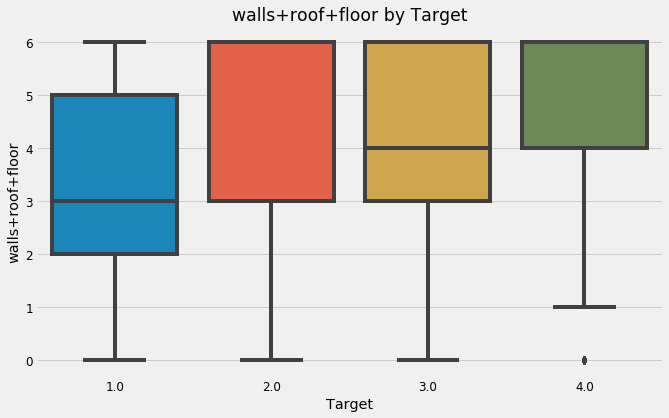

In [230]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'walls+roof+floor', data = final);
plt.title('walls+roof+floor by Target');

우리가 만든 변수들 중 일부는 타겟과 높은 상관관계를 가지고 있다는 것을 알 수 있다. 이러한 변수가 실제로 유용한지는 모델링 단계에서 결정될 것이다.

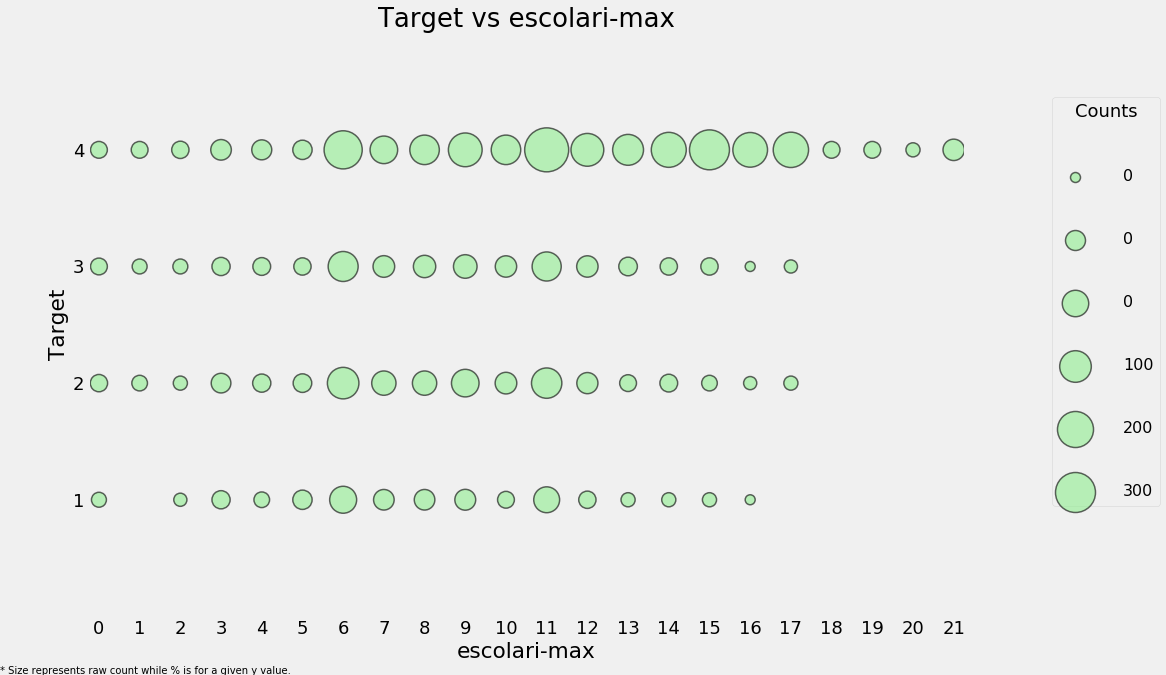

In [94]:
plot_categoricals('escolari-max', 'Target', final, annotate=False);

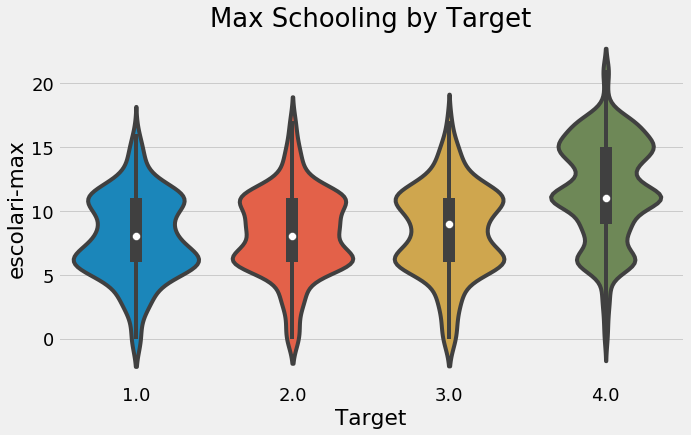

In [95]:
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'Target', y = 'escolari-max', data = final);
plt.title('Max Schooling by Target');

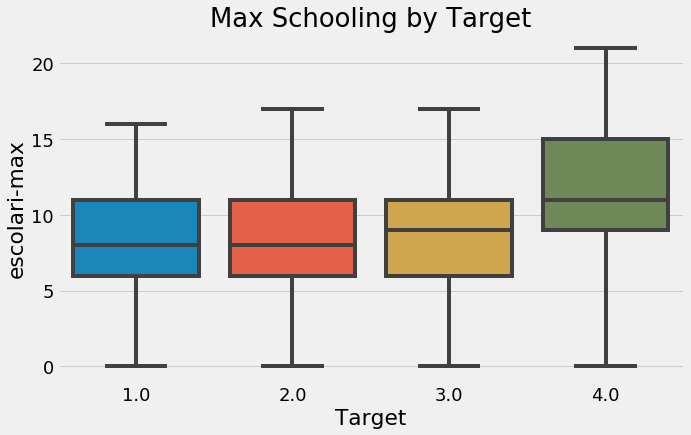

In [96]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'escolari-max', data = final);
plt.title('Max Schooling by Target');

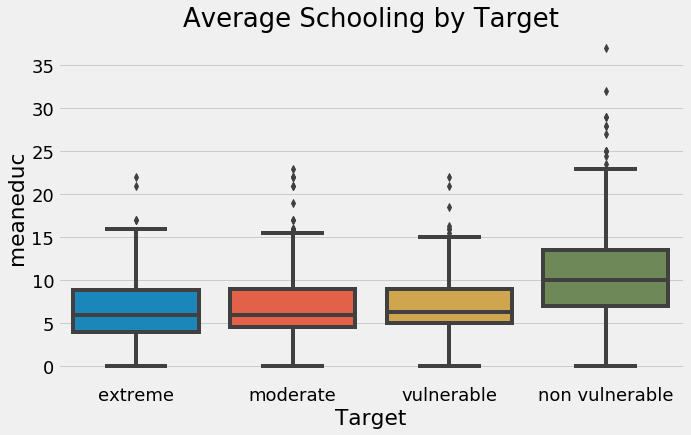

In [97]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'meaneduc', data = final);
plt.xticks([0, 1, 2, 3], poverty_mapping.values())
plt.title('Average Schooling by Target');

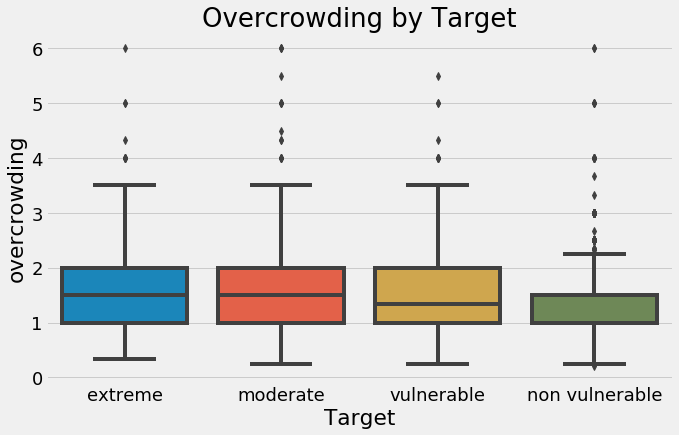

In [98]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Target', y = 'overcrowding', data = final);
plt.xticks([0, 1, 2, 3], poverty_mapping.values())
plt.title('Overcrowding by Target');

유용한 또 다른 특징은 가장의 성별이다. 데이터를 취합했으니 개인 수준 데이터로 돌아가서 가장의 성별을 찾아야 할 겁니다.

In [99]:
head_gender = ind.loc[ind['parentesco1'] == 1, ['idhogar', 'female']]
final = final.merge(head_gender, on = 'idhogar', how = 'left').rename(columns = {'female': 'female-head'})

In [100]:
final.groupby('female-head')['Target'].value_counts(normalize=True)

female-head  Target
0            4.0       0.682873
             2.0       0.136464
             3.0       0.123204
             1.0       0.057459
1            4.0       0.617369
             2.0       0.167670
             3.0       0.113500
             1.0       0.101462
Name: Target, dtype: float64

head가 여성인 가구는 빈곤 정도가 심할 가능성이 약간 더 높은 것으로 보인다.

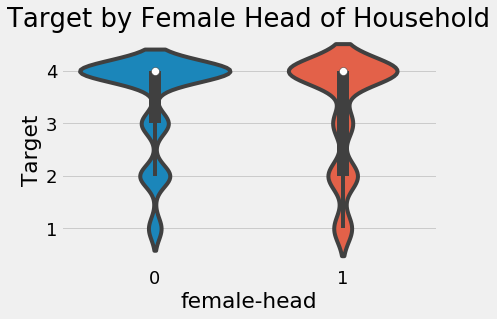

In [101]:
sns.violinplot(x = 'female-head', y = 'Target', data = final);
plt.title('Target by Female Head of Household');

우리는 또한 가족에 여성 가장이 있는지 없는지에 따라 평균 교육의 차이를 볼 수 있다.

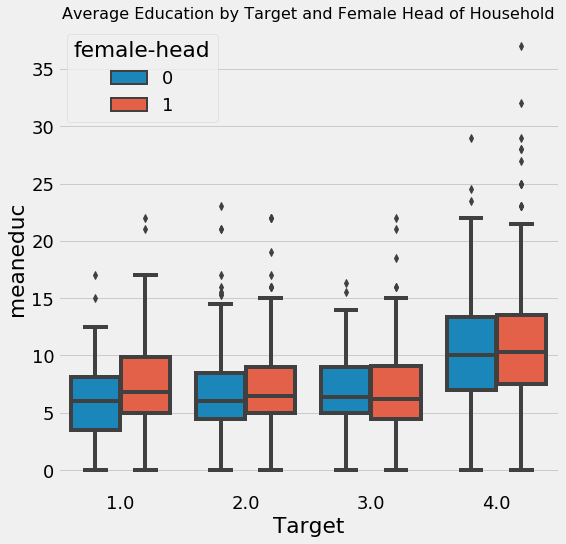

In [102]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'Target', y = 'meaneduc', hue = 'female-head', data = final);
plt.title('Average Education by Target and Female Head of Household', size = 16);

타겟의 모든 가치에서 여성 가장이 있는 가구는 더 높은 수준의 교육을 받는 것처럼 보인다. 그러나 우리는 전반적으로 여성 가장이 있는 가구가 심각한 빈곤을 겪을 가능성이 더 높다고 보았다.

In [103]:
final.groupby('female-head')['meaneduc'].agg(['mean', 'count'])

mean  count
female-head                 
0            8.968025   6384
1            9.237013   3903

전반적으로 여성 가장이 있는 가구의 평균 교육은 남성 가장이 있는 가구보다 약간 높다. 나는 이것을 어떻게 생각해야 할지 잘 모르겠어. 하지만 내가 보기에는 옳은 것 같아.

In [347]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer 
Imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Custom scorer for cross validation
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [348]:
# Labels for training
train_labels = np.array(list(final[final['Target'].notnull()]['Target'].astype(np.uint8)))

# Extract the training data
train_set = final[final['Target'].notnull()].drop(columns = ['Id', 'idhogar', 'Target'])
test_set = final[final['Target'].isnull()].drop(columns = ['Id', 'idhogar', 'Target'])

# Submission base which is used for making submissions to the competition
submission_base = test[['Id', 'idhogar']].copy()

## 정규화 하기 전 성능 

In [319]:
features = list(train_set.columns)

pipeline = Pipeline([('imputer', Imputer)])

# Fit and transform training data
train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

In [320]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_set, train_labels, test_size=0.2, random_state = 13)

In [339]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [322]:
from sklearn.linear_model import LogisticRegression

model_results = cv_model(X_train, y_train, 
                         LogisticRegression(random_state=13, solver='liblinear',C=10.0),
                         'Logisticreg', model_results)

10 Fold CV Score: 0.30182 with std: 0.02398


In [323]:
from sklearn.tree import DecisionTreeClassifier
model_results = cv_model(X_train, y_train, 
                         DecisionTreeClassifier(max_depth=2, random_state=13),
                         'decisiontree', model_results)

10 Fold CV Score: 0.19922 with std: 0.00033


In [324]:
from lightgbm import LGBMClassifier
model_results = cv_model(X_train, y_train, 
                         LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,boost_from_average=False),
                         'lqbmcla', model_results)

10 Fold CV Score: 0.38676 with std: 0.0452


In [325]:
model_results = cv_model(X_train, y_train, 
                         RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1),
                         'RF', model_results)

10 Fold CV Score: 0.35367 with std: 0.02814


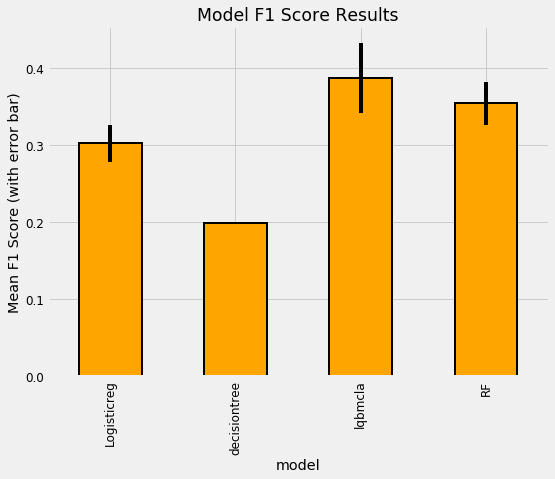

In [326]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

In [327]:
model_results

model   cv_mean    cv_std
0   Logisticreg  0.301822  0.023984
1  decisiontree  0.199215  0.000330
2       lqbmcla  0.386762  0.045201
3            RF  0.353670  0.028137

## ----------------------------------------------------------------------------------------------------------------------------------

서로 다른 모델을 비교해야하기 때문에 FEATURE SCALING이 필요하다 앙상블 모델에서는 필요 없지만 거리 METRIC을 기반으로 하는 KNN, SVM, 은 절대적으로 필요하다. 서로 다른 모델을 비교할 때는 FEATURE 를 SCALING하는게 항상 안전하다. 

결측치는 평균으로 계산한다. 결측치 처리와 FEATURE SCALING을 한번에 하기 위해 PIPELINE을 만들었다. 

## 정규화 한 후 성능 

In [349]:
features = list(train_set.columns)

pipeline = Pipeline([('imputer', Imputer), 
                      ('scaler', MinMaxScaler())])

# Fit and transform training data
train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

In [307]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_set, train_labels, test_size=0.2, random_state = 13)

In [311]:
from sklearn.linear_model import LogisticRegression

model_results = cv_model(X_train, y_train, 
                         LogisticRegression(random_state=13, solver='liblinear',C=10.0),
                         'Logisticreg', model_results)

10 Fold CV Score: 0.35232 with std: 0.02907


In [312]:
from sklearn.tree import DecisionTreeClassifier
model_results = cv_model(X_train, y_train, 
                         DecisionTreeClassifier(max_depth=2, random_state=13),
                         'decisiontree', model_results)

10 Fold CV Score: 0.19922 with std: 0.00033


In [313]:
from lightgbm import LGBMClassifier
model_results = cv_model(X_train, y_train, 
                         LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,boost_from_average=False),
                         'lqbmcla', model_results)

10 Fold CV Score: 0.37886 with std: 0.05459


In [314]:
model_results = cv_model(X_train, y_train, 
                         RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1),
                         'RF', model_results)

10 Fold CV Score: 0.35403 with std: 0.02973


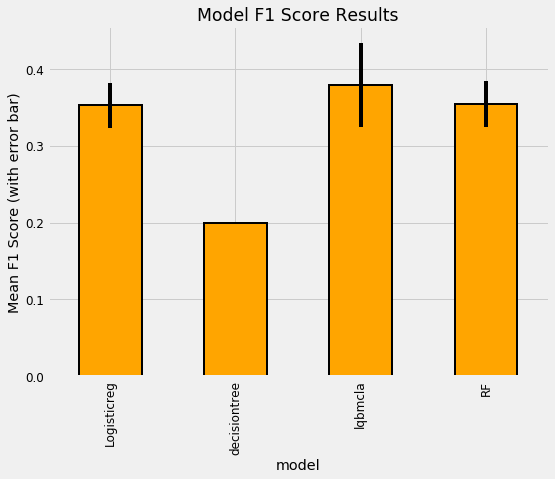

In [315]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

In [328]:
model_results

model   cv_mean    cv_std
0   Logisticreg  0.301822  0.023984
1  decisiontree  0.199215  0.000330
2       lqbmcla  0.386762  0.045201
3            RF  0.353670  0.028137

## -------------------------------------------------------------------------------

## 중요 변수 100개만 선정 후, 모델 비교 (정규화한 모델 사용)

In [333]:
important_features = feature_importances.sort_values(by=['importance'], axis=0, ascending = False).head(100)

In [335]:
important_features

100

In [ ]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(f'There are {len(to_drop)} correlated columns to remove.')

### RandomForestClassifier

In [113]:
model = RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1)
# 10 fold cross validation
cv_score = cross_val_score(model, train_set, train_labels, cv = 10, scoring = scorer)

print(f'10 Fold Cross Validation F1 Score = {round(cv_score.mean(), 4)} with std = {round(cv_score.std(), 4)}')

10 Fold Cross Validation F1 Score = 0.3439 with std = 0.0438


그 점수는 대단하지는 않지만, 베이스라인 역할을 할 것이고, 우리에게 많은 개선의 여지를 남겨줄 것이다!

## Feature Importances

랜덤 포레스트를 사용하여 변수 중요도를 볼 것이다. 변수 중요도를 파악하려면 training set 전체를 모델로 train 해야한다. cross validation은 변수 중요도를 return 하지 않는다. 

In [114]:
model.fit(train_set, train_labels)

# Feature importances into a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head()

feature  importance
0       hacdor    0.000643
1       hacapo    0.000283
2         v14a    0.000460
3       refrig    0.001798
4  paredblolad    0.006024

In [227]:
features

['hacdor',
 'hacapo',
 'v14a',
 'refrig',
 'paredblolad',
 'paredzocalo',
 'paredpreb',
 'pisocemento',
 'pareddes',
 'paredmad',
 'paredzinc',
 'paredfibras',
 'paredother',
 'pisomoscer',
 'pisoother',
 'pisonatur',
 'pisonotiene',
 'pisomadera',
 'techozinc',
 'techoentrepiso',
 'techocane',
 'techootro',
 'cielorazo',
 'abastaguadentro',
 'abastaguafuera',
 'abastaguano',
 'public',
 'planpri',
 'noelec',
 'coopele',
 'sanitario1',
 'sanitario2',
 'sanitario3',
 'sanitario5',
 'sanitario6',
 'energcocinar1',
 'energcocinar2',
 'energcocinar3',
 'energcocinar4',
 'elimbasu1',
 'elimbasu2',
 'elimbasu3',
 'elimbasu4',
 'elimbasu5',
 'elimbasu6',
 'epared1',
 'epared2',
 'epared3',
 'eviv1',
 'eviv2',
 'eviv3',
 'tipovivi1',
 'tipovivi2',
 'tipovivi3',
 'tipovivi4',
 'tipovivi5',
 'computer',
 'television',
 'lugar1',
 'lugar2',
 'lugar3',
 'lugar4',
 'lugar5',
 'lugar6',
 'area1',
 'v2a1-missing',
 'v2a1',
 'dependency',
 'edjefe',
 'edjefa',
 'meaneduc',
 'overcrowding',
 'rooms',
 

In [228]:
feature_importances[feature_importances['feature']=='overcrowding']

feature  importance
71  overcrowding     0.01368

In [229]:
feature_importances[feature_importances['feature']=='escolari/age-max']

feature  importance
214  escolari/age-max    0.018187

In [231]:
feature_importances[feature_importances['feature']=='walls+roof+floor']

feature  importance
95  walls+roof+floor    0.015055

In [330]:
feature_importances.sort_values(by=['importance'], axis=0, ascending = False).head(100)

feature  importance
70            meaneduc    0.024881
206            age-max    0.020916
205            age-min    0.020913
98   phones-per-capita    0.020488
208            age-std    0.019651
..                 ...         ...
7          pisocemento    0.003253
73                r4h1    0.003241
46             epared2    0.003197
184     instlevel5-sum    0.003181
32          sanitario3    0.003153

[100 rows x 2 columns]

In [ ]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(f'There are {len(to_drop)} correlated columns to remove.')

Below is a short function we'll use to plot the feature importances. I use this function a lot and often copy and paste it between scripts. I hope the documentation makes sense!

In [115]:
def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """
    plt.style.use('fivethirtyeight')
    
    # Sort features with most important at the head
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalize the feature importances to add up to one and calculate cumulative importance
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

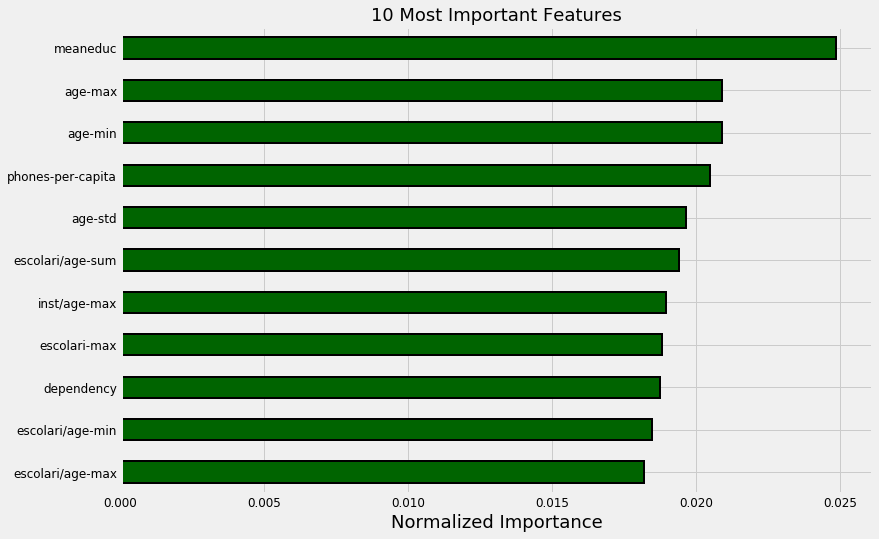

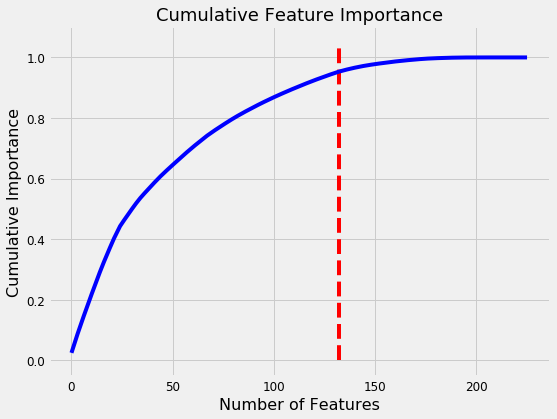

132 features required for 95% of cumulative importance.


In [116]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

교육이 최고다! 가장 중요한 변수는 가구 내 평균 교육량이고, 그 다음으로 가구 내 누구라도 최대 교육을 받을 수 있다. 나는 이 변수들이 높은 상관관계를 가지고 있다는 의심이 든다. 이것은 우리가 그들 중 하나를 데이터에서 삭제하기를 원할 수도 있다는 것을 의미한다. 또 다른 가장 중요한 특징은 우리가 만든 변수와 데이터에 이미 존재하는 변수의 조합이다.

180개 변수 중 106개 변수만 있으면 90%를 차지할 수 있다는 점이 흥미롭다. 이것은 우리가 몇몇 특징들을 제거할 수 있을지도 모른다는 것을 말해준다. 그러나, 특징적인 수입들은 우리에게 특징의 어떤 방향이 중요한지 알려주지 않는다. (예를 들어, 우리는 교육을 더 많이 받거나 덜 받는 것이 더 심각한 빈곤으로 이어지는지를 알려주기 위해 이것을 사용할 수 없다.) 그들은 우리에게 목적 적합하다고 여겨지는 모델이 어떤 특징인지만 알려준다.

In [117]:
def kde_target(df, variable):
    """Plots the distribution of `variable` in `df` colored by the `Target` column"""
    
    colors = {1: 'red', 2: 'orange', 3: 'blue', 4: 'green'}

    plt.figure(figsize = (12, 8))
    
    df = df[df['Target'].notnull()]
    
    for level in df['Target'].unique():
        subset = df[df['Target'] == level].copy()
        sns.kdeplot(subset[variable].dropna(), 
                    label = f'Poverty Level: {level}', 
                    color = colors[int(subset['Target'].unique())])

    plt.xlabel(variable); plt.ylabel('Density');
    plt.title('{} Distribution'.format(variable.capitalize()));

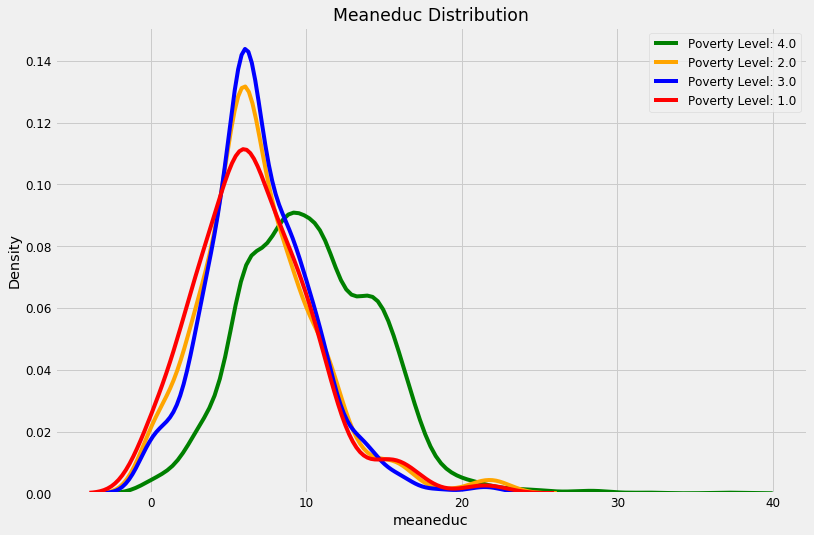

In [118]:
kde_target(final, 'meaneduc')

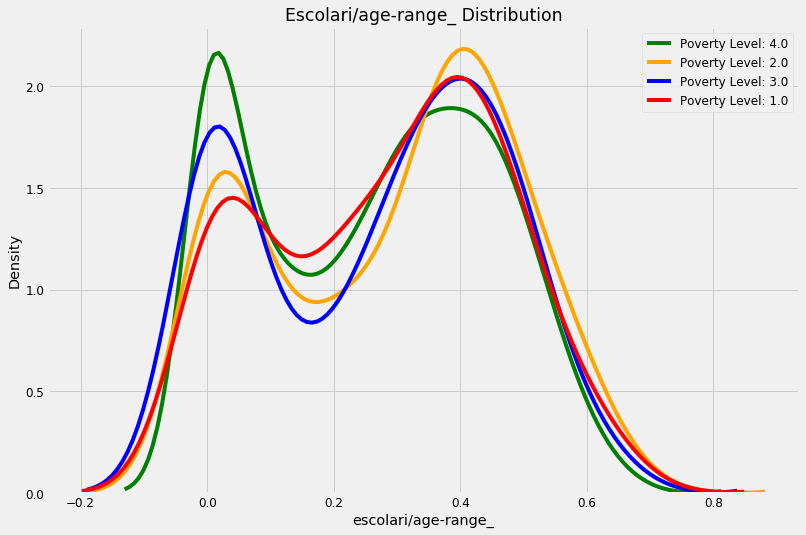

In [119]:
kde_target(final, 'escolari/age-range_')

## Model Selection

In [120]:
# Model imports
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [271]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [140]:
model_results = cv_model(train_set, train_labels, LinearSVC(), 
                         'LSVC', model_results)

10 Fold CV Score: 0.28614 with std: 0.04044


In [141]:
model_results = cv_model(train_set, train_labels, 
                         GaussianNB(), 'GNB', model_results)

10 Fold CV Score: 0.18451 with std: 0.03657


그 perfomace 매우 형편없다. 가우스 순진한 베이즈(Gaussian Senginness Bayes) 방식을 다시 검토할 필요는 없다고 생각한다(Gradient Boosting Machine을 능가할 수 있는 문제는 있지만).

In [142]:
model_results = cv_model(train_set, train_labels, 
                         MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32)),
                         'MLP', model_results)

10 Fold CV Score: 0.31198 with std: 0.0376


다층셉트론(심층 신경망)은 성능이 좋다. 이것은 우리가 네트워크를 하이퍼 파라미터로 튜닝할 수 있다면 선택사항이 될 수 있다. 그러나 제한된 양의 데이터는 효과적으로 학습하기 위해 일반적으로 수십만 개의 예를 필요로 하기 때문에 신경망에 문제가 될 수 있다.

In [143]:
model_results = cv_model(train_set, train_labels, 
                          LinearDiscriminantAnalysis(), 
                          'LDA', model_results)

10 Fold CV Score: 0.31792 with std: 0.06199


UserWarnings를 필터링하지 않고 LinearDiscriptionAnalysis를 실행하면 "변수는 콜린어"라는 메시지가 많이 나온다. 이것은 우리에게 우리가 몇몇 주름을 제거하고 싶은 힌트를 줄지도 몰라! 무작위 포리스트와 점수가 비슷하기 때문에 우리는 콜린어 변수를 제거한 후에 이 모델을 다시 시도해보고 싶을 것이다.

In [144]:
model_results = cv_model(train_set, train_labels, 
                         RidgeClassifierCV(), 'RIDGE', model_results)

10 Fold CV Score: 0.27803 with std: 0.0342


선형 모델(리듬 정규화 포함)은 놀라울 정도로 잘한다. 이것은 단순한 모델이 이 문제에서 큰 진전을 보일 수 있다는 것을 나타낼 수 있다. (그러나 우리는 아마도 더 강력한 방법을 사용하게 될 것이다.)

In [145]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set, train_labels, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.34765 with std: 0.03354

KNN with 10 neighbors

10 Fold CV Score: 0.31992 with std: 0.03213

KNN with 20 neighbors

10 Fold CV Score: 0.30723 with std: 0.04762


한 번 더 시도하면, 우리는 결정 나무의 앙상블을 사용하는 임의의 숲의 변종인 ExtraTreeClassifier를 고려할 것이다.

In [146]:
from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(train_set, train_labels, 
                         ExtraTreesClassifier(n_estimators = 100, random_state = 10),
                         'EXT', model_results)

10 Fold CV Score: 0.32681 with std: 0.05096


### 정규화와 결측치 처리를 한 후

### LogisticRegression

In [289]:
from sklearn.linear_model import LogisticRegression

model_results = cv_model(X_train, y_train, 
                         LogisticRegression(random_state=13, solver='liblinear',C=10.0),
                         'Logisticreg', model_results)

10 Fold CV Score: 0.28315 with std: 0.04401


### DecisionTreeClassifier

In [290]:
from sklearn.tree import DecisionTreeClassifier
model_results = cv_model(X_train, y_train, 
                         DecisionTreeClassifier(max_depth=2, random_state=13),
                         'decisiontree', model_results)

10 Fold CV Score: 0.19814 with std: 0.00062


### LGBMClassifier

In [291]:
from lightgbm import LGBMClassifier
model_results = cv_model(X_train, y_train, 
                         LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,boost_from_average=False),
                         'lqbmcla', model_results)

10 Fold CV Score: 0.3272 with std: 0.0383


### RandomForestClassifier

In [275]:
model_results = cv_model(X_train, y_train, 
                         RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1),
                         'RF', model_results)

10 Fold CV Score: 0.33996 with std: 0.05466


## Comparing Model Performance

In [156]:
model_results = cv_model(train_set, train_labels,
                          RandomForestClassifier(100, random_state=10),
                              'RF', model_results)

10 Fold CV Score: 0.34394 with std: 0.04381


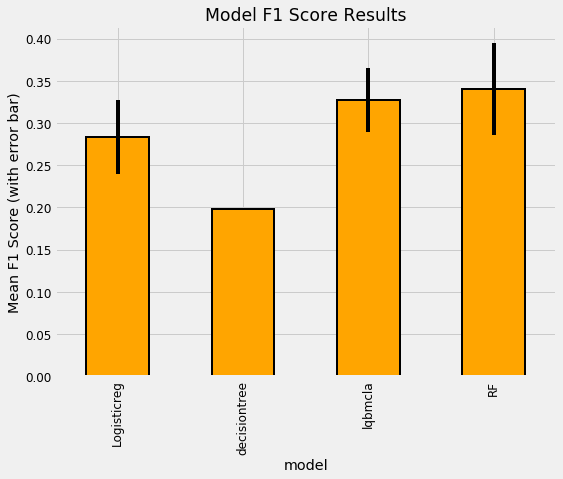

In [276]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Model F1 Score Results');
plt.ylabel('Mean F1 Score (with error bar)');
model_results.reset_index(inplace = True)

가장 유력한 후보는 무작위 숲인 것 같다. 왜냐하면 그것은 즉석에서 가장 잘 하기 때문이다. 우리가 하이퍼 파라미터들을 조정하지 않았기 때문에 모델들 간의 비교가 완벽하지 않지만, 이러한 결과는 트리 기반의 앙상블 방식(그라디언트 부스팅 머신 포함)이 구조화된 데이터셋에서 매우 잘 수행된다는 것을 발견하는 다른 많은 카글 경쟁자들의 것을 반영한다. 하이퍼 파라미터 성능은 머신러닝 모델의 성능을 향상시키지만, 우리는 모든 모델에 대해 가능한 모든 설정 조합을 시도할 시간이 없다. 아래 그래프(Randal Olson의 논문에서)는 Scikit-Learn의 하이퍼 파라미터 튜닝 대 기본값의 효과를 보여준다.

대부분의 경우 정확도 상승률이 10% 미만이기 때문에 최악의 모델은 튜닝을 통해 갑자기 최고의 모델이 되지는 않을 것이다.

일단은 무작위 숲이 가장 좋다고 할 수 있을 겁니다. 나중에 우리는 Scikit-Learn에서 구현되지는 않았지만 Gradient Boosting Machine을 사용하는 것을 볼 것이다. 대신 우리는 더 강력한 LightGBM 버전을 사용할 것이다. 자, 그럼 무작위 숲을 이용해서 제출하는 걸로 합

## 학교 코드 사용

In [350]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_set, train_labels, test_size=0.2, random_state = 13)

In [351]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
  acc = accuracy_score(y_test, pred)
  pre = precision_score(y_test, pred, average='micro')
  re = recall_score(y_test, pred,average='micro')
  f1 = recall_score(y_test, pred,average='micro')
  # auc = roc_auc_score(y_test, pred, multi_class='ovr',average='macro')

  return acc, pre, re, f1

In [352]:
def print_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test, pred)
  acc, pre, re, f1 = get_clf_eval(y_test, pred)

  print('=> 오차행렬')
  print(confusion)
  print('=========')

  print('accuracy: {0:.4f}, precision: {1:.4f}'.format(acc,pre))
  print('recall: {0:.4f}, F1: {1:.4f}'.format(re,f1))

## LogisticRegression

In [356]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear',C=10.0)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

=> 오차행렬
[[  7  18   4  25]
 [  3  27   4  51]
 [  5  19   7  46]
 [  5  17   6 351]]
accuracy: 0.6588, precision: 0.6588
recall: 0.6588, F1: 0.6588


In [385]:
# Create model and train
lr_clf = LogisticRegression(random_state=13, solver='liblinear',C=10.0)
lr_clf.fit(X_train, y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=13, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [386]:
# Make validation predictions
valid_preds = lr_clf.predict_proba(X_valid)
preds_df = pd.DataFrame(valid_preds, columns = [1, 2, 3, 4])

# Convert into predictions
preds_df['prediction'] = preds_df[[1, 2, 3, 4]].idxmax(axis = 1)
preds_df['confidence'] = preds_df[[1, 2, 3, 4]].max(axis = 1)

preds_df.head()

1         2         3         4  prediction  confidence
0  0.087682  0.081184  0.079810  0.751324           4    0.751324
1  0.013139  0.004195  0.003183  0.979483           4    0.979483
2  0.005745  0.192919  0.120645  0.680691           4    0.680691
3  0.178611  0.511324  0.183697  0.126369           2    0.511324
4  0.003954  0.428175  0.514468  0.053403           3    0.514468

In [387]:
print('F1 score:', round(f1_score(y_valid, preds_df['prediction'], average = 'macro'), 5))

F1 score: 0.3681


Confusion matrix, without normalization
[[ 11  30   3  36]
 [ 10  36  17  76]
 [  5  19  14  75]
 [  9  32  19 608]]


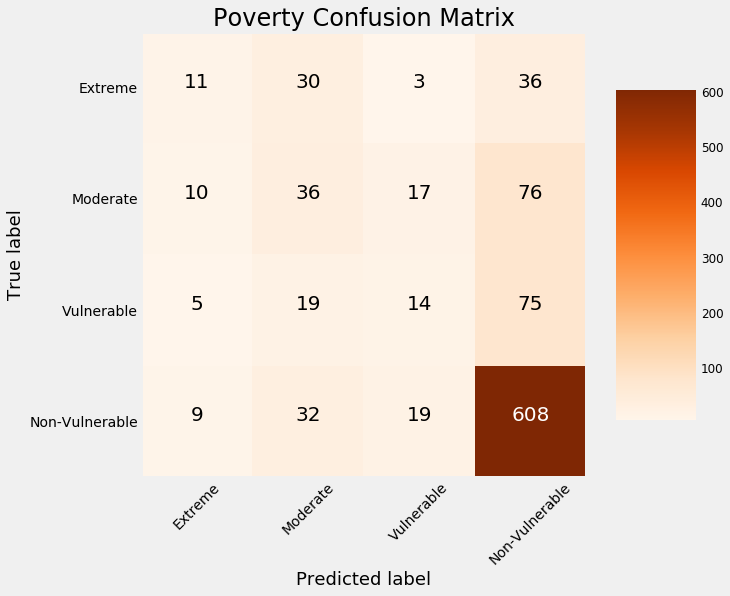

In [388]:
cm = confusion_matrix(y_valid, preds_df['prediction'])

plot_confusion_matrix(cm, classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Poverty Confusion Matrix')

## DecisionTreeClassifier

In [361]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> 오차행렬
[[  0   0   0  54]
 [  0   0   0  85]
 [  0   0   0  77]
 [  0   0   0 379]]
accuracy: 0.6370, precision: 0.6370
recall: 0.6370, F1: 0.6370


In [381]:
# Create model and train
dt_clf = DecisionTreeClassifier(max_depth=2, random_state=13)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [382]:
# Make validation predictions
valid_preds = dt_clf.predict_proba(X_valid)
preds_df = pd.DataFrame(valid_preds, columns = [1, 2, 3, 4])

# Convert into predictions
preds_df['prediction'] = preds_df[[1, 2, 3, 4]].idxmax(axis = 1)
preds_df['confidence'] = preds_df[[1, 2, 3, 4]].max(axis = 1)

preds_df.head()

1         2         3         4  prediction  confidence
0  0.041943  0.108168  0.099338  0.750552           4    0.750552
1  0.010050  0.017588  0.007538  0.964824           4    0.964824
2  0.125813  0.252711  0.191974  0.429501           4    0.429501
3  0.125813  0.252711  0.191974  0.429501           4    0.429501
4  0.125813  0.252711  0.191974  0.429501           4    0.429501

In [383]:
print('F1 score:', round(f1_score(y_valid, preds_df['prediction'], average = 'macro'), 5))

F1 score: 0.20024


Confusion matrix, without normalization
[[  0   0   0  80]
 [  0   0   0 139]
 [  0   0   0 113]
 [  0   0   0 668]]


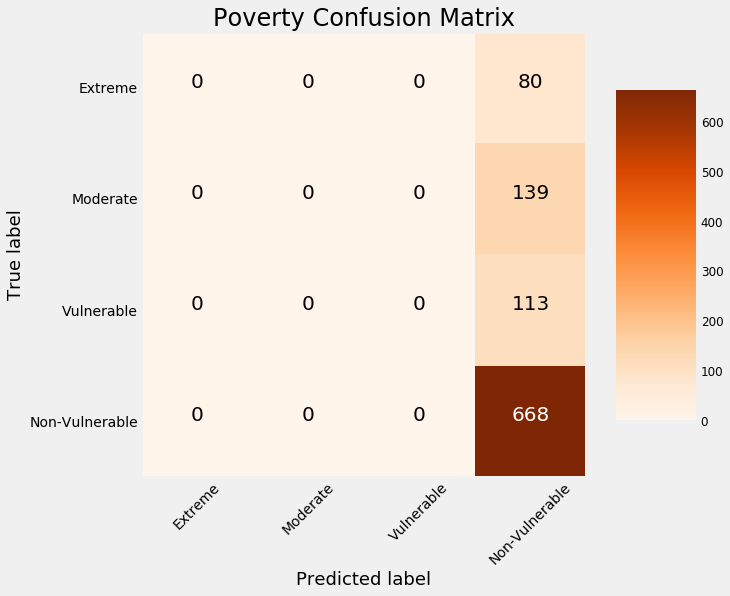

In [384]:
cm = confusion_matrix(y_valid, preds_df['prediction'])

plot_confusion_matrix(cm, classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Poverty Confusion Matrix')

## RandomForestClassifier

In [284]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> 오차행렬
[[  8  11   1  24]
 [  1  20   1  67]
 [  2   5   2  62]
 [  3   4   4 380]]
accuracy: 0.6891, precision: 0.6891
recall: 0.6891, F1: 0.6891


In [372]:
# Create model and train
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [378]:
# Make validation predictions
valid_preds = rf_clf.predict_proba(X_valid)
preds_df = pd.DataFrame(valid_preds, columns = [1, 2, 3, 4])

# Convert into predictions
preds_df['prediction'] = preds_df[[1, 2, 3, 4]].idxmax(axis = 1)
preds_df['confidence'] = preds_df[[1, 2, 3, 4]].max(axis = 1)

preds_df.head()

1     2     3     4  prediction  confidence
0  0.02  0.04  0.02  0.92           4        0.92
1  0.00  0.01  0.00  0.99           4        0.99
2  0.00  0.15  0.11  0.74           4        0.74
3  0.08  0.60  0.11  0.21           2        0.60
4  0.01  0.12  0.69  0.18           3        0.69

In [379]:
print('F1 score:', round(f1_score(y_valid, preds_df['prediction'], average = 'macro'), 5))

F1 score: 0.34688


Confusion matrix, without normalization
[[  9  25   4  42]
 [  2  41  12  84]
 [  3  17   2  91]
 [  1  22  12 633]]


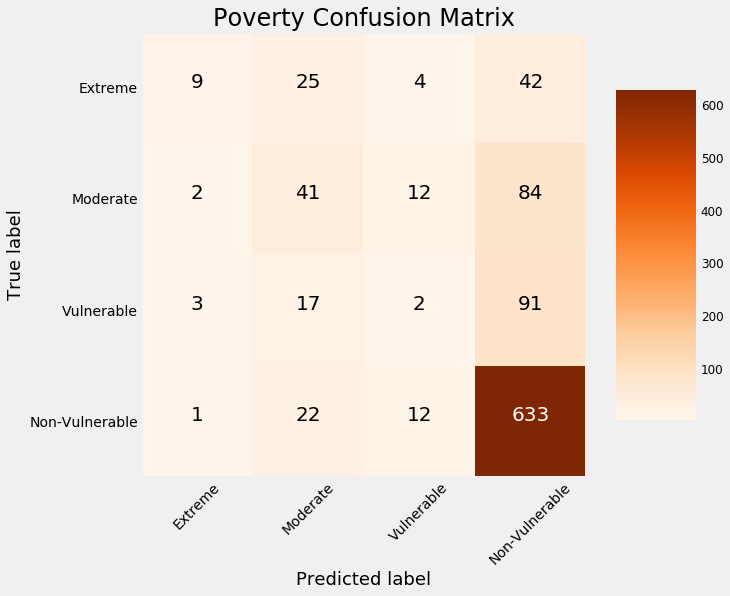

In [380]:
cm = confusion_matrix(y_valid, preds_df['prediction'])

plot_confusion_matrix(cm, classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Poverty Confusion Matrix')

## LGBMClassifier

In [365]:
from sklearn.model_selection import train_test_split

# Split into validation set
X_train, X_valid, y_train, y_valid = train_test_split(train_set,
                                                      train_labels,
                                                      test_size = 1000,
                                                      random_state = 10)

# Create model and train
model = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,boost_from_average=False)
model.fit(X_train, y_train);

In [366]:
# Make validation predictions
valid_preds = model.predict_proba(X_valid)
preds_df = pd.DataFrame(valid_preds, columns = [1, 2, 3, 4])

# Convert into predictions
preds_df['prediction'] = preds_df[[1, 2, 3, 4]].idxmax(axis = 1)
preds_df['confidence'] = preds_df[[1, 2, 3, 4]].max(axis = 1)

preds_df.head()

1             2             3         4  prediction  confidence
0  3.490222e-06  1.342377e-07  1.466131e-06  0.999995           4    0.999995
1  3.280072e-09  9.213007e-10  6.827696e-11  1.000000           4    1.000000
2  1.190921e-06  1.403355e-05  2.794804e-02  0.972037           4    0.972037
3  6.235575e-04  9.747062e-01  2.440183e-02  0.000268           2    0.974706
4  1.877254e-07  3.036567e-03  9.969601e-01  0.000003           3    0.996960

In [368]:
print('F1 score:', round(f1_score(y_valid, preds_df['prediction'], average = 'macro'), 5))

F1 score: 0.38419


In [369]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[ 12  21  11  36]
 [  6  43  12  78]
 [  5  17  14  77]
 [  4  40  25 599]]


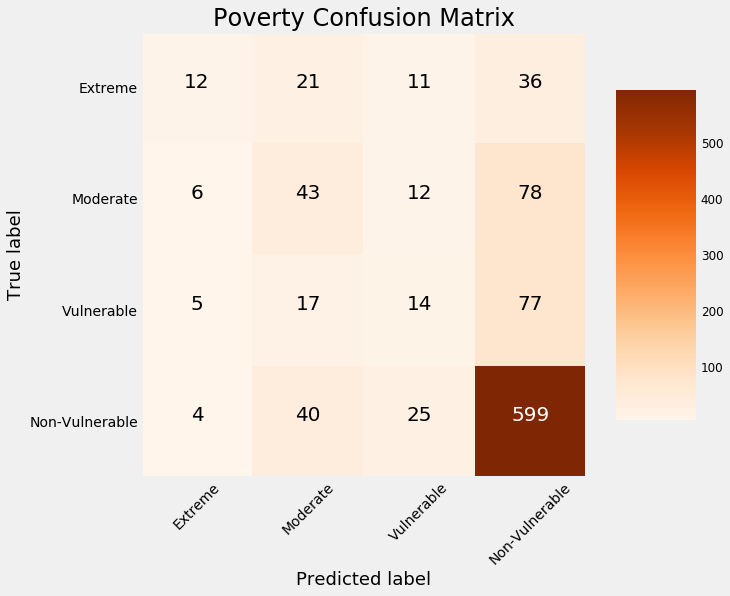

In [370]:
cm = confusion_matrix(y_valid, preds_df['prediction'])

plot_confusion_matrix(cm, classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Poverty Confusion Matrix')

Normalized confusion matrix
[[0.15       0.2625     0.1375     0.45      ]
 [0.04316547 0.30935252 0.08633094 0.56115108]
 [0.04424779 0.15044248 0.12389381 0.68141593]
 [0.00598802 0.05988024 0.03742515 0.89670659]]


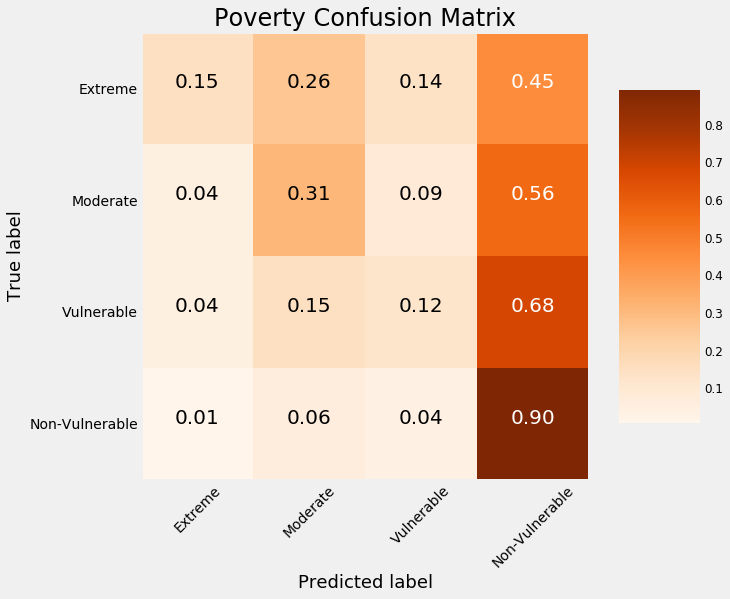

In [371]:
plot_confusion_matrix(cm, normalize = True,
                      classes = ['Extreme', 'Moderate', 'Vulnerable', 'Non-Vulnerable'],
                      title = 'Poverty Confusion Matrix')

In [285]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1,boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

print_clf_eval(y_test, lgbm_pred)

=> 오차행렬
[[  8  10   2  24]
 [  5  21   1  62]
 [  2   9   4  56]
 [  3   6   5 377]]
accuracy: 0.6891, precision: 0.6891
recall: 0.6891, F1: 0.6891


In [286]:
models = [lr_clf, rf_clf, dt_clf,lgbm_clf]
model_names = ['LogisticRegression','RandomForest', 'DecisionTree', 'LightBGM']
def get_result_pd(models, model_names,X_train,y_train,X_test,y_test):
  col_names = ['accuracy','precision','recall','fl']
  tmp = []

  for model in models:
    tmp.append(get_result(model,X_train,y_train,X_test,y_test))

  return pd.DataFrame(tmp, columns=col_names, index=model_names)

results = get_result_pd(models,model_names,X_train,y_train,X_test,y_test)
results

accuracy  precision    recall        fl
LogisticRegression  0.678992   0.678992  0.678992  0.678992
RandomForest        0.689076   0.689076  0.689076  0.689076
DecisionTree        0.657143   0.657143  0.657143  0.657143
LightBGM            0.689076   0.689076  0.689076  0.689076

## 하이퍼파라미터 튜닝 

이 데이터는 라벨별 데이터의 개수가 다른 불균형 데이터이다. 때문에 recall, precision 모두 고려한 f1 score 를 성능척도로 사용해야 하는데, f1 score가 가장 높은 RandomForest  모델을 선택해 하이퍼파라미터 튜닝을 실행하였다. 

### RandomForest 하이퍼파리미터 튜닝

In [219]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,4,5], 'min_samples_split':[2,3,4]}
grid_clf = GridSearchCV(rf_clf, param_grid = parameters, cv = 3)

In [220]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=13,
                                    

In [221]:
grid_clf.best_params_

{'max_depth': 5, 'min_samples_split': 2}

In [222]:
grid_clf.best_score_

0.678300448792252

In [224]:
clf_best = grid_clf.best_estimator_

pred = clf_best.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> 오차행렬
[[  0   0   0  54]
 [  0   0   0  85]
 [  0   0   0  77]
 [  0   0   0 379]]
accuracy: 0.6370, precision: 0.6370
recall: 0.6370, F1: 0.6370


### 캐글 코드 사용

## Model Optimization

### Model Tuning with Hyperopt

Bayesian 최적화에 필요한 4가지 요소:

목표 기능: 최대화(또는 최소화)하려는 기능
도메인 공간: 검색할 영역
다음 하이퍼 파라미터 선택 알고리즘: 과거 결과를 사용하여 다음 값을 제안
결과 기록: 이전 결과 저장
나는 이전에 하이퍼옵트를 사용하는 것에 대해 쓴 적이 있으므로, 여기서는 구현을 고수하겠다.

In [234]:
pip install hyperopt

In [235]:
from hyperopt import hp, tpe, Trials, fmin, STATUS_OK
from hyperopt.pyll.stochastic import sample

In [236]:
import csv
import ast
from timeit import default_timer as timer

## 1. Objective Function

이것은 모델 하이퍼 매개변수를 사용하고 관련 유효성 검사 점수를 반환한다. 하이퍼옵트는 최소화를 위해 점수가 필요하므로 매크로 F1 점수를 반환한다.

In [237]:
def objective(hyperparameters, nfolds=5):
    """Return validation score from hyperparameters for LightGBM"""
    
    # Keep track of evals
    global ITERATION
    ITERATION += 1
    
    # Retrieve the subsample
    subsample = hyperparameters['boosting_type'].get('subsample', 1.0)
    subsample_freq = hyperparameters['boosting_type'].get('subsample_freq', 0)
    
    boosting_type = hyperparameters['boosting_type']['boosting_type']
    
    if boosting_type == 'dart':
        hyperparameters['drop_rate'] = hyperparameters['boosting_type']['drop_rate']
    
    # Subsample and subsample frequency to top level keys
    hyperparameters['subsample'] = subsample
    hyperparameters['subsample_freq'] = subsample_freq
    hyperparameters['boosting_type'] = boosting_type
    
    # Whether or not to use limit maximum depth
    if not hyperparameters['limit_max_depth']:
        hyperparameters['max_depth'] = -1
    
    # Make sure parameters that need to be integers are integers
    for parameter_name in ['max_depth', 'num_leaves', 'subsample_for_bin', 
                           'min_child_samples', 'subsample_freq']:
        hyperparameters[parameter_name] = int(hyperparameters[parameter_name])

    if 'n_estimators' in hyperparameters:
        del hyperparameters['n_estimators']
    
    # Using stratified kfold cross validation
    strkfold = StratifiedKFold(n_splits = nfolds, shuffle = True)
    
    # Convert to arrays for indexing
    features = np.array(train_selected)
    labels = np.array(train_labels).reshape((-1 ))
    
    valid_scores = []
    best_estimators = []
    run_times = []
    
    model = lgb.LGBMClassifier(**hyperparameters, class_weight = 'balanced',
                               n_jobs=-1, metric = 'None',
                               n_estimators=10000)
    
    # Iterate through the folds
    for i, (train_indices, valid_indices) in enumerate(strkfold.split(features, labels)):
        
        # Training and validation data
        X_train = features[train_indices]
        X_valid = features[valid_indices]
        y_train = labels[train_indices]
        y_valid = labels[valid_indices]
        
        start = timer()
        # Train with early stopping
        model.fit(X_train, y_train, early_stopping_rounds = 100, 
                  eval_metric = macro_f1_score, 
                  eval_set = [(X_train, y_train), (X_valid, y_valid)],
                  eval_names = ['train', 'valid'],
                  verbose = 400)
        end = timer()
        # Record the validation fold score
        valid_scores.append(model.best_score_['valid']['macro_f1'])
        best_estimators.append(model.best_iteration_)
        
        run_times.append(end - start)
    
    score = np.mean(valid_scores)
    score_std = np.std(valid_scores)
    loss = 1 - score
    
    run_time = np.mean(run_times)
    run_time_std = np.std(run_times)
    
    estimators = int(np.mean(best_estimators))
    hyperparameters['n_estimators'] = estimators
    
    # Write to the csv file ('a' means append)
    of_connection = open(OUT_FILE, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, hyperparameters, ITERATION, run_time, score, score_std])
    of_connection.close()
    
    # Display progress
    if ITERATION % PROGRESS == 0:
        display(f'Iteration: {ITERATION}, Current Score: {round(score, 4)}.')
    
    return {'loss': loss, 'hyperparameters': hyperparameters, 'iteration': ITERATION,
            'time': run_time, 'time_std': run_time_std, 'status': STATUS_OK, 
            'score': score, 'score_std': score_std}

2. 공간 검색
도메인은 우리가 검색하고자 하는 값의 전체 범위다. 유일한 어려운 부분은 부스팅_type="goss"일 경우 1.0으로 설정해야 하는 하위표본 비율이다. 여기서 가치관을 자유롭게 가지고 놀아라.

In [238]:
# Define the search space
space = {
    'boosting_type': hp.choice('boosting_type', 
                              [{'boosting_type': 'gbdt', 
                                'subsample': hp.uniform('gdbt_subsample', 0.5, 1),
                                'subsample_freq': hp.quniform('gbdt_subsample_freq', 1, 10, 1)}, 
                               {'boosting_type': 'dart', 
                                 'subsample': hp.uniform('dart_subsample', 0.5, 1),
                                 'subsample_freq': hp.quniform('dart_subsample_freq', 1, 10, 1),
                                 'drop_rate': hp.uniform('dart_drop_rate', 0.1, 0.5)},
                                {'boosting_type': 'goss',
                                 'subsample': 1.0,
                                 'subsample_freq': 0}]),
    'limit_max_depth': hp.choice('limit_max_depth', [True, False]),
    'max_depth': hp.quniform('max_depth', 1, 40, 1),
    'num_leaves': hp.quniform('num_leaves', 3, 50, 1),
    'learning_rate': hp.loguniform('learning_rate', 
                                   np.log(0.025), 
                                   np.log(0.25)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 2000, 100000, 2000),
    'min_child_samples': hp.quniform('min_child_samples', 5, 80, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.5, 1.0)
}

In [239]:
sample(space)

{'boosting_type': {'boosting_type': 'dart',
  'drop_rate': 0.24931701438034684,
  'subsample': 0.6521228977000819,
  'subsample_freq': 5.0},
 'colsample_bytree': 0.7602959866561099,
 'learning_rate': 0.06856013262465158,
 'limit_max_depth': True,
 'max_depth': 6.0,
 'min_child_samples': 50.0,
 'num_leaves': 15.0,
 'reg_alpha': 0.3686823013181404,
 'reg_lambda': 0.7679478897088685,
 'subsample_for_bin': 10000.0}

3. Algorithm
The algorithm for choosing the next values is the Tree Parzen Estimator which uses Bayes rule for constructing a surrogate model of the objective function. Instead of maximizing the objective function, the algorithm maximizes the Expected Improvement (EI) of the surrogate model.

In [240]:
algo = tpe.suggest

4. Results History
We'll use two different methods for recording results:

Trials object: stores everything returned from the objective function
Write to a csv file on every iteration
I like using multiple methods for tracking progress because it means redundancy. One way may fail, but hopefully both will not! The csv file can be used to monitor the method while it is running and the Trials object can be saved and then reloaded to resume optimization.

In [241]:
# Record results
trials = Trials()

# Create a file and open a connection
OUT_FILE = 'optimization.csv'
of_connection = open(OUT_FILE, 'w')
writer = csv.writer(of_connection)

MAX_EVALS = 100
PROGRESS = 10
N_FOLDS = 5
ITERATION = 0

# Write column names
headers = ['loss', 'hyperparameters', 'iteration', 'runtime', 'score', 'std']
writer.writerow(headers)
of_connection.close()

%%capture --no-display
display("Running Optimization for {} Trials.".format(MAX_EVALS))

### Run optimization
best = fmin(fn = objective, space = space, algo = tpe.suggest, trials = trials,
            max_evals = MAX_EVALS)